<font size= 3><b>Marion Coutarel</b><br>
[Open Classrooms](https://openclassrooms.com/fr/paths/324-data-analyst)   
    <right> Parcours Data Analyst V2 - Projet 4</right></font>

<img src="https://afr100.org/sites/default/files/FAO_logo_Blue_3lines_en.jpg" title="logo FAO" />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
import seaborn as sns
import lux

# <font color =cornflowerblue>importation de données </font>

## <u>Sous-nutrition</u>


In [2]:
dataSN= pd.read_csv('data/sous_nutrition.csv', encoding ='utf-8')
dataSN.head()

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [3]:
dataSN.Zone.nunique()


203

In [4]:
dataSN.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


### Suppression des tuples sans valeur

594 entrées ne contienent pas de valeur. On les supprime.

In [5]:
# vérification des nan
dataSN.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64


C:\Users\mario\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


In [6]:
#supression des nan
dataSN1= dataSN.dropna()

In [7]:
dataSN1.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64


C:\Users\mario\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


In [8]:
#reset de l'index
dataSN1.reset_index(drop='True')
dataSN1.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


### Création d'une année médiane et suppresion de l'accent dans le nom de la colonne


De manière à facilité la comparaison de table à table on créée une année médiane. On en profite pour supprimer l'accent dans Année.

In [9]:
#liste des valeurs prise par la colonne 'Année'
dataSN1['Année'].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [10]:
#création d'un dictionnaire de substitution
anneeMoy= {'2012-2014':'2013','2013-2015':'2014','2014-2016':'2015','2015-2017':'2016','2016-2018':'2017',
           '2017-2019':'2018'}
# substitution des couples d'année par leur valeur médiane
dataSN1.copy=dataSN1['Année'].replace(anneeMoy, inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###  Modification des types de données de la table

In [11]:
#vérification des types de données du df

dataSN1.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    624 non-null    object
 1   Année   624 non-null    object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB


In [12]:
# transformation du type de la colonne année en datetime
dataSN1['Annee']= dataSN1['Année'].astype("int64")

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\frame.py:3040: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
dataSN1=dataSN1.drop(['Année'], axis=1)


In [14]:
dataSN1.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 624 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    624 non-null    object
 1   Valeur  624 non-null    object
 2   Annee   624 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.5+ KB


In [15]:
dataSN1['Annee'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

### Transformation de la colonne 'valeur' en float

In [16]:
#identification des entrées posant problème
dataSN1['Valeur'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', '7.6', '6.2', '5.3', '5.6',
       '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7', '22.4',
       '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8', '0.4',
       '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1', '2.3',
       '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8', '4.6',
       '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3', '21.3',
       '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3', '193.1',
       '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7', '7.3',
       '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5', '11.9',
       '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9', '5.9', '7',
       '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7', '17.4', '20.2',
       '22.2', '22.8', '24.6', '31.1', '28.5', '25.4', '24.8', '26.1',
       '14.5', '15.4', '16.5', '15.8', '15.7', '10.8', '11.2', '11.6

In [17]:
#combien de valeurs sont concernées
dataSN1[dataSN1['Valeur']=='<0.1'].Zone.unique()

array(['Arménie', 'Barbade', 'Belize', 'Cabo Verde',
       'Chine - RAS de Macao', 'Chypre', 'Dominique', 'Fidji', 'Guyana',
       'Îles Salomon', 'Kiribati', 'Macédoine du Nord', 'Maurice',
       'Nouvelle-Calédonie', 'Polynésie française',
       'Saint-Vincent-et-les Grenadines', 'Samoa', 'Sao Tomé-et-Principe',
       'Suriname', 'Trinité-et-Tobago', 'Vanuatu'], dtype=object)

On choisit de remplacer '<0.1' par '0'

In [18]:
#on remplace <0,1 par 0,05
dataSN1= dataSN1.replace(to_replace='<0.1', value= '0')

In [19]:
dataSN1[dataSN1['Valeur']=='0']

,Zone,Valeur,Annee
60,Arménie,0,2013
61,Arménie,0,2014
62,Arménie,0,2015
63,Arménie,0,2016
64,Arménie,0,2017
...,...,...,...
1183,Vanuatu,0,2014
1184,Vanuatu,0,2015
1185,Vanuatu,0,2016
1186,Vanuatu,0,2017


In [20]:
# verification des valeurs uniques
dataSN1['Valeur'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', '7.6', '6.2', '5.3', '5.6',
       '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '0', '21.7', '22.4',
       '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8', '0.4',
       '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1', '2.3',
       '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8', '4.6',
       '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3', '21.3',
       '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3', '193.1',
       '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7', '7.3',
       '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5', '11.9',
       '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9', '5.9', '7',
       '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7', '17.4', '20.2',
       '22.2', '22.8', '24.6', '31.1', '28.5', '25.4', '24.8', '26.1',
       '14.5', '15.4', '16.5', '15.8', '15.7', '10.8', '11.2', '11.6',


In [21]:
dataSN1['Valeur']= dataSN1['Valeur'].astype(float)

In [22]:
dataSN1.dtypes

Zone       object
Valeur    float64
Annee       int64
dtype: object


In [23]:
dataSN1['Annee'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [24]:
dataSN1['Zone'].nunique()

107

## <u>importation des données de population</u>

### vérification des données

In [25]:
dataPop= pd.read_csv('data/population.csv', encoding= 'utf-8')

dataPop.describe(include='all')

C:\Users\mario\anaconda3\lib\site-packages\lux\executor\PandasExecutor.py:250: UserWarning:
Lux detects that the attribute 'Zone' maybe contain mixed type.
To visualize this attribute, you may want to convert the 'Zone' into a uniform type as follows:
	df['Zone'] = df['Zone'].astype(str)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
dataPop.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64


C:\Users\mario\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


In [27]:
dataPop.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


### Supression de l'accent du label 'Année' et expression de la population en milion

In [28]:
#renommer 'Année' en 'Annee'
dataPop1=dataPop.rename(columns={"Année":"Annee"})



In [29]:
dataPop1.head()

,Zone,Annee,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [30]:
# expression de la population en milion
dataPop1['Valeur']= dataPop['Valeur']/1000

In [31]:
dataPop1.head()

,Zone,Annee,Valeur
0,Afghanistan,2013,32.269589
1,Afghanistan,2014,33.370794
2,Afghanistan,2015,34.413603
3,Afghanistan,2016,35.383032
4,Afghanistan,2017,36.296113


In [32]:
dataPop1.Annee.unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

## <u>importation des données de disponibilité alimentaire</u>

### vérification des données

In [33]:
dataDispoAlim = pd.read_csv('data/dispo_alimentaire.csv', encoding='utf-8')
dataDispoAlim.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [34]:
dataDispoAlim.head()


C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [35]:
dataDispoAlim.shape

(15605, 18)

### Modification des labels des colonnes


On choisit des noms de colonne plus faciles à  manipuler

In [36]:
dataDispoAlim.columns.values.tolist()

['Zone',
 'Produit',
 'Origine',
 'Aliments pour animaux',
 'Autres Utilisations',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'Variation de stock']

In [37]:
DispoAlim= dataDispoAlim.rename(columns= {
 'Aliments pour animaux': 'alimAnim',
 'Autres Utilisations': 'autreUtilisation',
 'Disponibilité alimentaire (Kcal/personne/jour)':'dispoAlim',
 'Disponibilité alimentaire en quantité (kg/personne/an)':'dispoAlimQt',
 'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispoMatGrasQt',
 'Disponibilité de protéines en quantité (g/personne/jour)': 'dispoProtQt',
 'Disponibilité intérieure':'dispoInter',
 'Exportations - Quantité':'export',
 'Importations - Quantité': 'import',
 'Variation de stock':'variationStock'
})

In [38]:
DispoAlim.head()

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

C:\Users\mario\anaconda3\lib\site-packages\lux\core\frame.py:700: UserWarning:Traceback (most recent call last):
  File "C:\Users\mario\anaconda3\lib\site-packages\lux\core\frame.py", line 651, in _repr_html_
    self.maintain_recs()
  File "C:\Users\mario\anaconda3\lib\site-packages\lux\core\frame.py", line 480, in maintain_recs
    custom_action_collection = custom_actions(rec_df)
  File "C:\Users\mario\anaconda3\lib\site-packages\lux\action\custom.py", line 76, in custom_actions
    recommendation = lux.config.actions[action_name].action(ldf)
  File "C:\Users\mario\anaconda3\lib\site-packages\lux\action\correlation.py", line 50, in correlation
    vlist = VisList(intent, ldf)
  File "C:\Users\mario\anaconda3\lib\site-pac

,Zone,Produit,Origine,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoMatGrasQt,dispoProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [39]:
DispoAlim.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zone              15605 non-null  object 
 1   Produit           15605 non-null  object 
 2   Origine           15605 non-null  object 
 3   alimAnim          2720 non-null   float64
 4   autreUtilisation  5496 non-null   float64
 5   dispoAlim         14241 non-null  float64
 6   dispoAlimQt       14015 non-null  float64
 7   dispoMatGrasQt    11794 non-null  float64
 8   dispoProtQt       11561 non-null  float64
 9   dispoInter        15382 non-null  float64
 10  export            12226 non-null  float64
 11  import            14852 non-null  float64
 12  Nourriture        14015 non-null  float64
 13  Pertes            4278 non-null   float64
 14  Production        9180 non-null   float64
 15  Semences          2091 non-null   float64
 16  Traitement        2292 non-null   float6

In [40]:
DispoAlim[DispoAlim['dispoInter'].isna()]

,Zone,Produit,Origine,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoMatGrasQt,dispoProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock
35,Afghanistan,Miscellanees,vegetale,NaN,NaN,1.0,NaN,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Afrique du Sud,Miscellanees,vegetale,NaN,NaN,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,Albanie,Miscellanees,vegetale,NaN,NaN,5.0,NaN,0.06,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,Algérie,Miscellanees,vegetale,NaN,NaN,2.0,NaN,0.03,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,Allemagne,Miscellanees,vegetale,NaN,NaN,0.0,NaN,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,Équateur,Miscellanees,vegetale,NaN,NaN,2.0,NaN,0.02,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15394,États-Unis d'Amérique,Miscellanees,vegetale,NaN,NaN,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15486,Éthiopie,Miscellanees,vegetale,NaN,NaN,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15560,Îles Salomon,Huile de Tournesol,vegetale,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> importation des disponibilité alimentaires 2017</h3>

In [41]:
dataDispoAlim2017 = pd.read_csv('data/dispo_alimentaire2017.csv', encoding='utf-8')

In [42]:
dataDispoAlim2017.head(5)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Domaine,Zone,Élément,Produit,Année,Valeur
0,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Produits Vegetaux,2017,1855.00
1,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Vegetaux,2017,45.02
2,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité de matière grasse en quantité (g...,Produits Vegetaux,2017,17.91
3,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Produits Animaux,2017,195.00
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,2017,11.14


In [43]:
dataDispoAlim2017.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 182097 entries, 0 to 182096
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Domaine  182097 non-null  object 
 1   Zone     182097 non-null  object 
 2   Élément  182097 non-null  object 
 3   Produit  182097 non-null  object 
 4   Année    182097 non-null  int64  
 5   Valeur   182097 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ MB


<h4>suppression des colones inutiles</h4>

In [44]:
dataDispoAlim2017.drop(columns=['Domaine','Année'], inplace=True)

In [45]:
DispoAlim2017=pd.pivot_table(data=dataDispoAlim2017, index=['Zone','Produit'], values='Valeur', columns='Élément', aggfunc=sum)

In [46]:
DispoAlim2017

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux does not currently support dataframes with hierarchical indexes.
Please convert the dataframe into a flat table via `pandas.DataFrame.reset_index`.



Élément                              Alimentation pour touristes  \
Zone         Produit                                               
Afghanistan  Abats Comestible                                NaN   
             Agrumes, Autres                                 NaN   
             Alcool, non Comestible                          NaN   
             Aliments pour enfants                           NaN   
             Ananas et produits                              NaN   
...                                                          ...   
Îles Salomon Viande de Volailles                             0.0   
             Viande de porcins                               0.0   
             Viande, Autre                                   0.0   
             Vin                                             0.0   
             Épices, Autres                                  0.0   

Élément                              Aliments pour animaux  \
Zone         Produit                                         
Afghanistan  Abats Comestible                          NaN   
             Agrumes, Autres                           NaN   
             Alcool, non Comestible                    NaN   
             Aliments pour enfants                     NaN   
             Ananas et produits                        NaN   
...                                                    ...   
Îles Salomon Viande de Volailles                       NaN   
             Viande de porcins                         NaN   
             Viande, Autre                             NaN   
             Vin                                       NaN   
             Épices, Autres                            NaN   

Élément                              Autres utilisations (non alimentaire)  \
Zone         Produit                                                         
Afghanistan  Abats Comestible                                          NaN   
             Agrumes, Autres                                           NaN   
             Alcool, non Comestible                                    NaN   
             Aliments pour enfants                                     NaN   
             Ananas et produits                                        NaN   
...                                                                    ...   
Îles Salomon Viande de Volailles                                       NaN   
             Viande de porcins                                         NaN   
             Viande, Autre                                             NaN   
             Vin                                                       NaN   
             Épices, Autres                                            NaN   

Élément                              Disponibilité alimentaire (Kcal/personne/jour)  \
Zone         Produit                                                                  
Afghanistan  Abats Comestible                                                   5.0   
             Agrumes, Autres                                                    1.0   
             Alcool, non Comestible                                             NaN   
             Aliments pour enfants                                              1.0   
             Ananas et produits                                                 0.0   
...                                                                             ...   
Îles Salomon Viande de Volailles                                               19.0   
             Viande de porcins                                                 43.0   
             Viande, Autre                                                      0.0   
             Vin                                                                0.0   
             Épices, Autres                                                     4.0   

Élément                              Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone         Produit                                              

<h4>Renommage des colonnes</h4>

In [47]:
DispoAlim2017.columns.tolist()

['Alimentation pour touristes',
 'Aliments pour animaux',
 'Autres utilisations (non alimentaire)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'Pertes',
 'Production',
 'Résidus',
 'Semences',
 'Traitement',
 'Variation de stock']

In [48]:
tableDispoAlim2017=DispoAlim2017.rename(columns={'Alimentation pour touristes': 'alimTouriste',
 'Aliments pour animaux':'alimAnim',
 'Autres utilisations (non alimentaire)':'autreUtilisation',
 'Disponibilité alimentaire (Kcal/personne/jour)':'dispoAlim',
 'Disponibilité alimentaire en quantité (kg/personne/an)':'dispoAlimQt',
 'Disponibilité de matière grasse en quantité (g/personne/jour)':'dispoAlimMatGrasQt',
 'Disponibilité de protéines en quantité (g/personne/jour)':'dispoAlimProtQt',
 'Disponibilité intérieure':'dispoInter',
 'Exportations - Quantité':'export',
 'Importations - Quantité':'import',
 'Variation de stock' :'variationStock' 
})

In [49]:
tableDispoAlim2017.sample(5)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux does not currently support dataframes with hierarchical indexes.
Please convert the dataframe into a flat table via `pandas.DataFrame.reset_index`.



,Élément,alimTouriste,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoAlimMatGrasQt,dispoAlimProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
Zone,Produit,,,,,,,,,,,,,,,,,
Kirghizistan,Huiles de Foie de Poisso,NaN,NaN,0.0,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Liban,Avoine,NaN,0.0,NaN,1.0,0.20,0.01,0.04,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
Niger,Riz et produits,NaN,0.0,NaN,146.0,22.86,0.20,2.81,-42.0,646.0,713.0,494.0,4.0,113.0,-548.0,7.0,0.0,222.0
Chypre,Palmistes,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Iraq,Pois,NaN,0.0,NaN,7.0,0.74,0.04,0.46,24.0,NaN,24.0,24.0,NaN,NaN,0.0,NaN,NaN,0.0


<font size=3> vérification de la marge d'erreur concernant la ventillation des la disponibilité interne via la consommation</font>

In [50]:
(tableDispoAlim2017.dispoInter.sum()-tableDispoAlim2017.alimAnim.sum()-tableDispoAlim2017.autreUtilisation.sum()-tableDispoAlim2017.alimTouriste.sum()-tableDispoAlim2017.Nourriture.sum()-tableDispoAlim2017.Semences.sum()+tableDispoAlim2017['Résidus'].sum()-tableDispoAlim2017.Traitement.sum())/tableDispoAlim2017.dispoInter.sum()

0.04968787529450702

## <u>Importation des données d'aide alimentaire</u>

In [51]:
dataAideAlim= pd.read_csv('data/aide_alimentaire.csv', encoding="utf-8")
dataAideAlim.head()

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [52]:
dataAideAlim.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64


C:\Users\mario\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


In [53]:
dataAideAlim.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [54]:
dataAideAlim['Produit'].unique()

array(['Autres non-céréales', 'Blé et Farin', 'Céréales',
       'Fruits secs, total', 'Huiles végétales',
       'Légumineuses Sèches,Tot.', 'Non-céréales', 'Riz, total',
       'Sucre, total', 'Céréales Secondaires', 'Lait, total',
       'Mélanges et préparations', 'Poiss&produi', 'BulgurFarEnt',
       'Viande Total', 'Graisses Com'], dtype=object)

<h3> Renommage des colonnes</h3>

In [55]:
AideAlim= dataAideAlim.rename(columns={'Année':'Annee'})

In [56]:
AideAlim.query("Annee==2013").sort_values(by="Valeur", ascending=False).head(20)

,Pays bénéficiaire,Annee,Produit,Valeur
362,Éthiopie,2013,Céréales,256196
1013,République arabe syrienne,2013,Céréales,189623
357,Éthiopie,2013,Blé et Farin,181066
1270,Soudan,2013,Céréales,140255
1273,Soudan,2013,Céréales Secondaires,130677
1005,République arabe syrienne,2013,Blé et Farin,122708
1422,Yémen,2013,Céréales,117155
1418,Yémen,2013,Blé et Farin,116637
626,Kenya,2013,Céréales,92906
1027,République arabe syrienne,2013,Non-céréales,92273


## importation des données de situtation géographique des pays

In [57]:
dataPays=pd.read_csv('data/continent.csv', sep=';', encoding="utf-8")
dataPays.head()

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone
0,Asie,Afghanistan
1,Afrique,"Afrique de l'Ouest, non spécifié(population)"
2,Afrique,Afrique du Sud
3,Europe,Albanie
4,Afrique,Algérie


# <font color=cornflowerblue>Requête sur l'année 2017</font>

## <u>Proportion de personne souffrant de sous-nutrition</u>

### préparation des données


In [58]:
dataSN1.head()

,Zone,Valeur,Annee
0,Afghanistan,8.6,2013
1,Afghanistan,8.8,2014
2,Afghanistan,8.9,2015
3,Afghanistan,9.7,2016
4,Afghanistan,10.5,2017


In [59]:
dataPop1.head()

,Zone,Annee,Valeur
0,Afghanistan,2013,32.269589
1,Afghanistan,2014,33.370794
2,Afghanistan,2015,34.413603
3,Afghanistan,2016,35.383032
4,Afghanistan,2017,36.296113


In [60]:
CheckPays= list(set(dataSN1.Zone.unique()).difference(dataPop1.Zone.unique()))
CheckPays

[]

jointure entre dataSN1 et dataPop1 sur l'Annee et la Zone

In [61]:

result = pd.merge(dataSN1, dataPop1, how="left", on=["Zone","Annee"])

In [62]:
result.head()

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,Valeur_x,Annee,Valeur_y
0,Afghanistan,8.6,2013,32.269589
1,Afghanistan,8.8,2014,33.370794
2,Afghanistan,8.9,2015,34.413603
3,Afghanistan,9.7,2016,35.383032
4,Afghanistan,10.5,2017,36.296113


renommage des colonnes


In [63]:

table= result.rename(columns={'Valeur_x': 'PopSN', 'Valeur_y': 'PopTot'})

In [64]:
table.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    624 non-null    object 
 1   PopSN   624 non-null    float64
 2   Annee   624 non-null    int64  
 3   PopTot  624 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 24.4+ KB


### calcul de la proportion de personne sous-nutrie en % de la pop totale du pays

In [65]:
#calcul de la proportion de personne sous-nutrie en % de la pop totale du pays
proportionSN= table['PopSN']/table['PopTot']

In [66]:
proportionSN.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [67]:
#ajout de la colonne proportionSN à la table
tablePop= pd.concat([table,proportionSN], axis=1)

In [68]:
tablePop.rename(columns={0:'%SN'}, inplace=True)

In [69]:
tablePop.head(3)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,PopSN,Annee,PopTot,%SN
0,Afghanistan,8.6,2013,32.269589,0.266505
1,Afghanistan,8.8,2014,33.370794,0.263704
2,Afghanistan,8.9,2015,34.413603,0.258619


### table valeur SN 2017


In [70]:
# création d'une table ne contenant que 2017
table2017= tablePop[tablePop['Annee']==2017]
table2017.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

on réorganise la table en %SN descendant et on effectue une mise en forme en %

In [71]:
table2017=table2017.sort_values(by='%SN', ascending=False)
table2017.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 104 entries, 249 to 316
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    104 non-null    object 
 1   PopSN   104 non-null    float64
 2   Annee   104 non-null    int64  
 3   PopTot  104 non-null    float64
 4   %SN     104 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.9+ KB


In [72]:
table2017.head(10).style.format({'%SN':"{:.2%}"})

,Zone,PopSN,Annee,PopTot,%SN
249,Haïti,5.300000,2017,10.982366,48.26%
496,République populaire démocratique de Corée,12.000000,2017,25.429825,47.19%
346,Madagascar,10.500000,2017,25.570512,41.06%
334,Libéria,1.800000,2017,4.702226,38.28%
322,Lesotho,0.800000,2017,2.091534,38.25%
569,Tchad,5.700000,2017,15.016753,37.96%
508,Rwanda,4.200000,2017,11.980961,35.06%
400,Mozambique,9.400000,2017,28.649018,32.81%
581,Timor-Leste,0.400000,2017,1.243258,32.17%
4,Afghanistan,10.500000,2017,36.296113,28.93%


In [73]:
table2017.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Table valeur SN par année

In [74]:
#Creation d'une table regroupant les valeurs par années
tableParAnnee= table.groupby('Annee').sum()

tableParAnnee


,PopSN,PopTot
Annee,,
2013,528.1,3920.539059
2014,523.5,3922.927861
2015,524.7,4060.824315
2016,528.6,4077.242402
2017,535.7,4182.831358
2018,544.2,4243.448893


In [75]:
PropSNparAn= tableParAnnee['PopSN']*100/tableParAnnee['PopTot']
PropSNparAn

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [76]:
tablePop.head(5)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [77]:
tablePropSNParZone= pd.pivot_table(tablePop,values='%SN',index='Zone',columns='Annee')
tablePropSNParZone

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [78]:
tablePropSNParZone['EvolSN']= tablePropSNParZone[2017]- tablePropSNParZone[2013]

In [79]:
tablePropSNParZone.sort_values(by='EvolSN', ascending=False).dropna().drop(columns=2018).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Annee,2013,2014,2015,2016,2017,EvolSN
Zone,,,,,,
Lesotho,0.147890,0.244685,0.388534,0.385537,0.382494,0.234604
Venezuela (République bolivarienne du),0.047010,0.086543,0.139619,0.207696,0.272086,0.225076
Mozambique,0.230823,0.266300,0.310628,0.330579,0.328109,0.097286
Rwanda,0.258983,0.297736,0.343036,0.351364,0.350556,0.091574
Eswatini,0.092010,0.182645,0.181152,0.179534,0.177809,0.085799
Madagascar,0.330992,0.368802,0.400263,0.413748,0.410629,0.079637
République populaire démocratique de Corée,0.413165,0.431004,0.444730,0.458359,0.471887,0.058722
Mauritanie,0.078586,0.076318,0.098856,0.120090,0.116752,0.038167
Nigéria,0.085582,0.098637,0.111518,0.119380,0.119451,0.033869


### <font color = orange>résultats</font>

<font size =4> /!\ Les données de sous nutritions ne concernent que <font color=cornflowerblue>55,4%</font> de la population de 2017</font>

In [80]:
table2017['PopTot'].sum()*100/dataPop1.query("Annee==2017").Valeur.sum()

55.415435079568894

In [81]:
#proportion de personnes sous-nutries en 2017
PropSNTot = (table2017['PopSN'].sum()*100/table2017['PopTot'].sum())
print('Le pourcentage de personnes sous-nutries dans les pays concernés est : {}%'.format( round (PropSNTot,2)))

Le pourcentage de personnes sous-nutries dans les pays concernés est : 12.81%


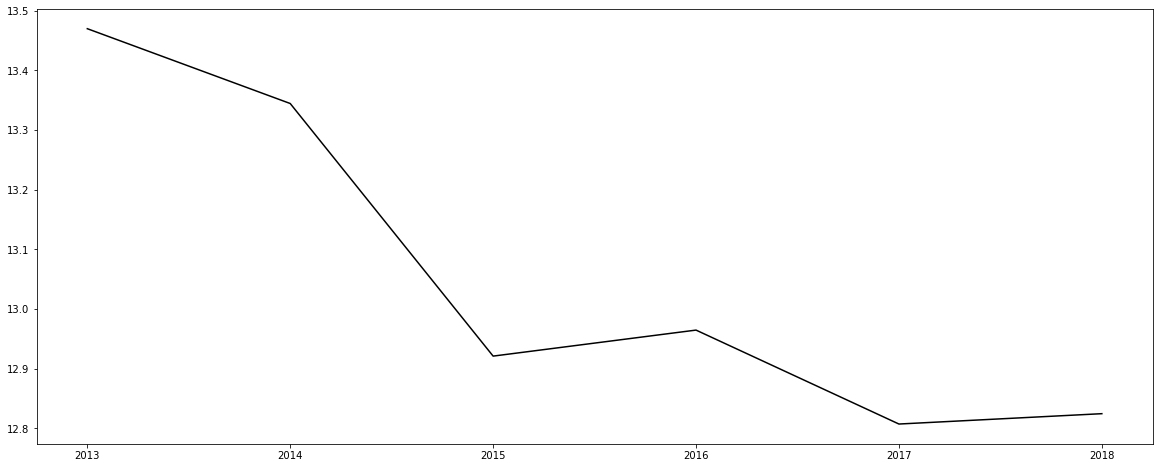

In [82]:
#Evolution de la part de personnes sous-nutries dans la pop totale
fig = plt.figure(figsize=(20,8))
plt.plot(PropSNparAn, color='k')

<font Size=4><font color=cornflowerblue>La situation semble s'améliorer au niveau mondial </font> avec une baise de 0.6 point de la proportion de personnes sous-nutries entre 2013 et 2017.<br>
<br>
Cependant la situation reste critique par endroit.<br>
    Des <font color=cornflowerblue>milions d'individus souffrent de sous nutrition</font> (principalement en Asie du Sud Est) et il y a encore
    <font color= cornflowerblue>13 pays où la sous-nutrition touche plus du quart de la population</font> (principalement en Afrique)

    
</font>

In [83]:
# 10 pays dont la propotion de personnes souffrant de sous-nutrition est la plus élevée
table2017.head(15).style.format({'%SN':"{:.2%}"})

,Zone,PopSN,Annee,PopTot,%SN
249,Haïti,5.300000,2017,10.982366,48.26%
496,République populaire démocratique de Corée,12.000000,2017,25.429825,47.19%
346,Madagascar,10.500000,2017,25.570512,41.06%
334,Libéria,1.800000,2017,4.702226,38.28%
322,Lesotho,0.800000,2017,2.091534,38.25%
569,Tchad,5.700000,2017,15.016753,37.96%
508,Rwanda,4.200000,2017,11.980961,35.06%
400,Mozambique,9.400000,2017,28.649018,32.81%
581,Timor-Leste,0.400000,2017,1.243258,32.17%
4,Afghanistan,10.500000,2017,36.296113,28.93%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

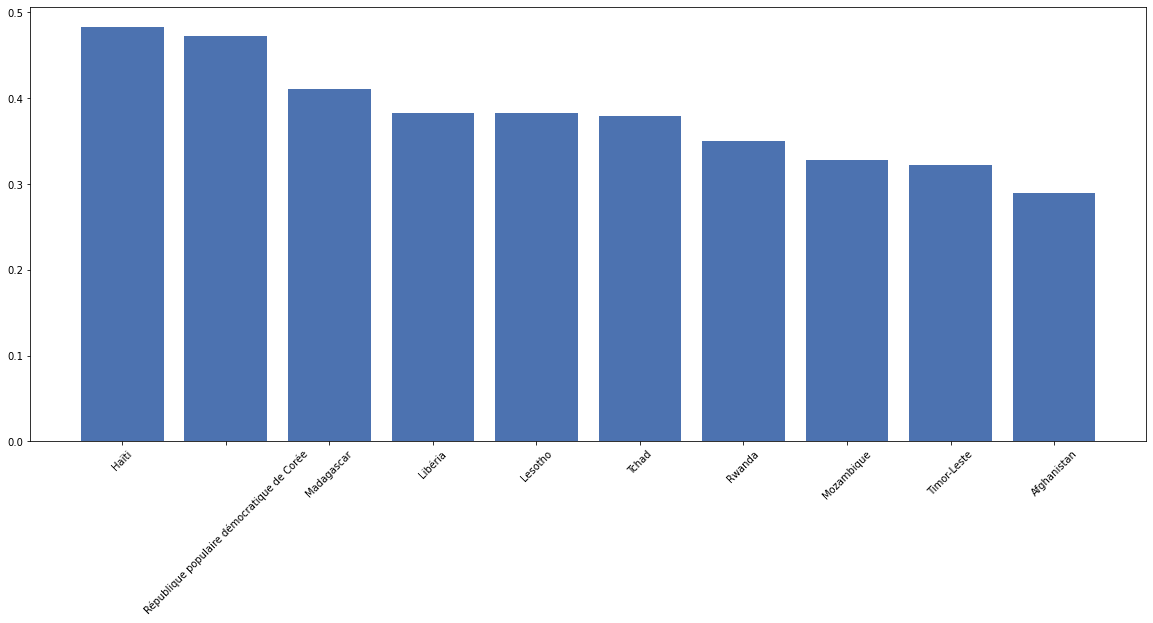

In [84]:
fig = plt.figure(figsize=(20,8))
histoPopSNpct= plt.bar(table2017.sort_values(by='%SN', ascending=False).head(10)['Zone']
    ,table2017.sort_values(by='%SN', ascending=False).head(10)['%SN'])
plt.xticks(rotation=45)

In [85]:
# 10 pays comptant le plus de personnes souffrant de sous-nutrition
table2017.sort_values(by='PopSN', ascending=False).head(15)

,Zone,PopSN,Annee,PopTot,%SN
267,Inde,190.1,2017,1338.676785,0.142006
454,Pakistan,24.8,2017,207.906209,0.119285
273,Indonésie,23.6,2017,264.650963,0.089174
430,Nigéria,22.8,2017,190.873244,0.119451
51,Bangladesh,21.5,2017,159.685424,0.134640
201,Éthiopie,21.1,2017,106.399924,0.198308
478,Philippines,15.7,2017,105.172925,0.149278
502,République-Unie de Tanzanie,13.4,2017,54.660339,0.245150
496,République populaire démocratique de Corée,12.0,2017,25.429825,0.471887
304,Kenya,11.9,2017,50.221142,0.236952


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

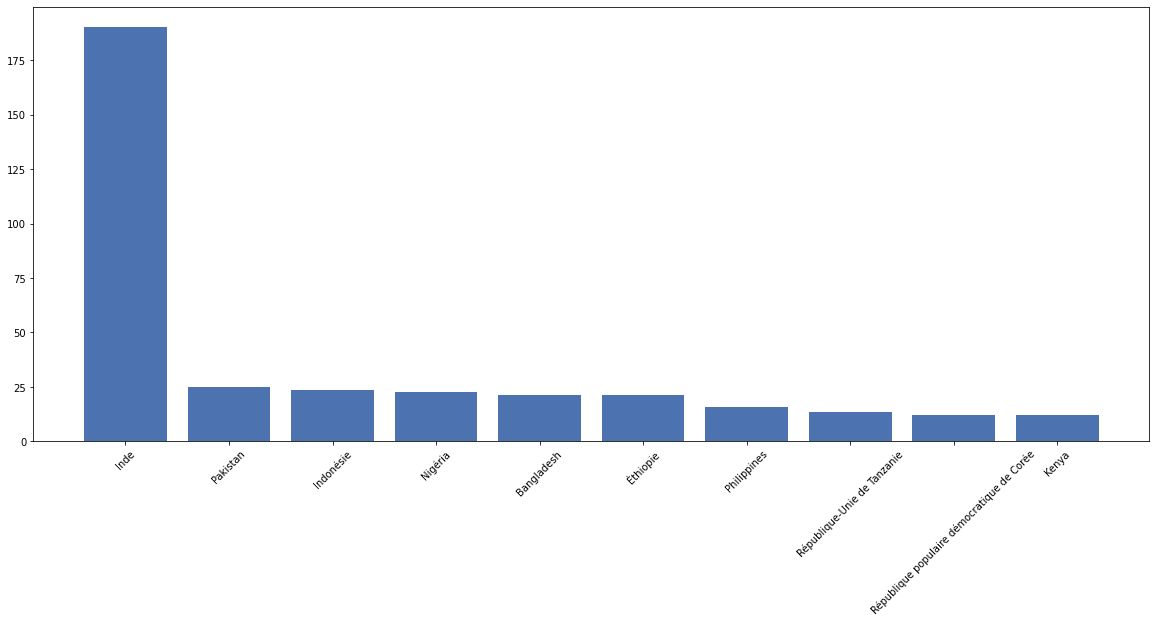

In [86]:
fig = plt.figure(figsize=(20,8))
histoPopSNpct= plt.bar(table2017.sort_values(by='PopSN', ascending=False).head(10)['Zone']
    ,table2017.sort_values(by='PopSN', ascending=False).head(10)['PopSN'])
plt.xticks(rotation=45)

## <u>Nombre théorique de personnes qui pourraient être nourries</u>

<h3>2013</h3>

In [87]:
DispoAlim

,Zone,Produit,Origine,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoMatGrasQt,dispoProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [88]:
# on supprime la ventillation par produit et on ne conserve que la disponibilité alimentaire
tableDispoAlimZone= DispoAlim.groupby(by='Zone').dispoAlim.sum()
tableDispoAlimZone.describe()


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [89]:
# On ajoute ces données au données concernant la population
dataPop2013=dataPop1[dataPop1['Annee']==2013]

DispoAlim2013= pd.merge(dataPop2013, tableDispoAlimZone, how='right' , on='Zone')
DispoAlim2013.rename(columns={'Valeur': 'Population'}, inplace=True)

In [90]:
del DispoAlim2013['Annee']

In [91]:
DispoAlim2013.dropna()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [92]:
# on créé une colone qui multiplie la disposition alimentaire par personne et par jour de chaque pays et sa population

DispoAlim2013['dispoAlimTot']= DispoAlim2013.Population*DispoAlim2013.dispoAlim

In [93]:
DispoAlim2013.head()


C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,Population,dispoAlim,dispoAlimTot
0,Afghanistan,32.269589,2087.0,67346.632243
1,Afrique du Sud,53.687121,3020.0,162135.105420
2,Albanie,2.903790,3188.0,9257.282520
3,Algérie,38.140133,3293.0,125595.457969
4,Allemagne,81.174367,3503.0,284353.807601


In [94]:
seuilSN=1800
seuilMN= 2500 # seuil de cal/jr en dessous duquel on considère la personne en mal-nutrition
consommationAlimMoy =2800 #consommation calorique moyenne cf rapport du Sénat 2001


### <font color=Orange>résultat</font>

In [95]:
x=DispoAlim2013.Population.sum()*100/dataPop1[dataPop1['Annee']==2013].Valeur.sum()

print('les données que nous étudions concernent {} % de la population mondiale'.format(
   round(x,2)))


les données que nous étudions concernent 96.66 % de la population mondiale


In [96]:
print('{} % de la population avec seuil de 2500cal/jr'.format(
    round(DispoAlim2013.dispoAlimTot.sum()/seuilMN*100/DispoAlim2013.Population.sum(), 2)))

print("{} % de la population avec une consommation alimentaire moyenne à 2800cal/jr ".format(
    round(DispoAlim2013.dispoAlimTot.sum()/consommationAlimMoy*100/DispoAlim2013.Population.sum(), 2)))

115.04 % de la population avec seuil de 2500cal/jr
102.71 % de la population avec une consommation alimentaire moyenne à 2800cal/jr 


<font size= 4>Sur <font color=cornflowerblue>2013</font>, nos données concernent 96.66% de la population mondiale. De nombreux débat existe pour calculer le besoin en apport calorique au niveau mondial. Ceux-ci varient fortement en fonction du genre, de la taille, du poids, de l'âge, de l'activité physique et du climat dans lequel évolue l'individu.   
    Par soucis de simplification, nous avons choisis 2 seuils :  
    - <font color=cornflowerblue>2 500 cal/pers/jour</font>, le seuil de mal-nutrition qui permettrait de nourrir <font color=cornflowerblue>115% de la population</font> étudiée  
    - <font color=cornflowerblue>2 800 cal/pers/jour</font>, la consomation alimentaire mooyenne mondiale qui permettrait de nourrir <font color=cornflowerblue>102.7% de la population</font>. <br>
[source](https://fr.wikipedia.org/wiki/Ration_alimentaire#cite_note-2) </font>

<h3>2017</h3>

In [97]:
dataDispoAlim2017.Produit.unique()

array(['Produits Vegetaux', 'Produits Animaux', 'Blé et produits',
       'Riz et produits', 'Orge et produits', 'Maïs et produits',
       'Seigle et produits', 'Avoine', 'Millet et produits',
       'Sorgho et produits', 'Céréales, Autres', 'Manioc et produits',
       'Pommes de Terre et produits', 'Patates douces', 'Ignames',
       'Racines nda', 'Sucre, canne', 'Sucre, betterave',
       'Sucre non centrifugé', 'Sucre Eq Brut', 'Edulcorants Autres',
       'Miel', 'Haricots', 'Pois', 'Légumineuses Autres et produits',
       'Noix et produits', 'Soja', 'Arachides', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Palmistes', 'Olives', 'Plantes Oleiferes, Autre',
       'Huile de Soja', "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',

In [98]:
dataPop2017 = dataPop1[dataPop1['Annee'] == 2017]
tableDA2017 = pd.merge(tableDispoAlim2017.query("Produit in ['Produits Vegetaux','Produits Animaux']")[
                       'dispoAlim'], dataPop2017, how='left', on='Zone')
tableDA2017['dispoAlimTot']=tableDA2017['dispoAlim']*tableDA2017['Valeur']
tableDA2017

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [99]:
tableDA2017.sort_values(by='dispoAlim', ascending=False).head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<h3> <font color= orange>résultats</font></h3>

In [100]:
print('les données que nous étudions concernent {} % de la population mondiale'.format(
   round((tableDA2017.Valeur.sum()*100/2/dataPop1[dataPop1['Annee']==2017].Valeur.sum()),2)))


les données que nous étudions concernent 97.62 % de la population mondiale


In [101]:
print('{} % de la population avec seuil de 2500cal/jr'.format(
    round(tableDA2017.dispoAlimTot.sum()/seuilMN*100/(tableDA2017.Valeur.sum()/2), 2)))
print('{} % de la population avec seuil de 1800cal/jr'.format(
    round(tableDA2017.dispoAlimTot.sum()/seuilSN*100/(tableDA2017.Valeur.sum()/2), 2)))

print("{} % de la population avec une consommation alimentaire moyenne à 2800cal/jr ".format(
    round(tableDA2017.dispoAlimTot.sum()/consommationAlimMoy*100/(tableDA2017.Valeur.sum()/2), 2)))

116.85 % de la population avec seuil de 2500cal/jr
162.29 % de la population avec seuil de 1800cal/jr
104.33 % de la population avec une consommation alimentaire moyenne à 2800cal/jr 


<font size= 4>Sur <font color=cornflowerblue>2017</font>, nos données concernent 97.62% de la population mondiale.   
   selon les  2 seuils :  
    - <font color=cornflowerblue>2 500 cal/pers/jour</font>, le seuil de mal-nutrition qui permettrait de nourrir <font color=cornflowerblue>116.85% de la population</font> étudiée  
    - <font color=cornflowerblue>2 800 cal/pers/jour</font>, la consomation alimentaire mooyenne mondiale qui permettrait de nourrir <font color=cornflowerblue>104.3% de la population</font>.  <br> 
    Si on compare les 2 années, on voit <font color =cornflowerblue>les disponibilités alimentaires augmentent plus vite que la population</font> ce qui est cohérent avec la baisse de la sous-nutrition observée</font>

## <u>Population pouvant être nourrie à partir des disponibilités alimentaire végétales</u>

<h3>2013</h3>

In [102]:
dataPop2013=dataPop1[dataPop1['Annee']==2013]

DispoAlimType2013= pd.merge(dataPop2013, DispoAlim,  on='Zone')
DispoAlimType2013.rename(columns={'Valeur': 'Population'}, inplace=True)


In [103]:
del DispoAlimType2013['Annee']

In [104]:
DispoAlimType2013.head(5)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,Population,Produit,Origine,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoMatGrasQt,dispoProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock
0,Afghanistan,32.269589,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,32.269589,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,32.269589,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,32.269589,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,32.269589,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [105]:
DispoAlimType2013.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [106]:
DispoAlimType2013['Origine'].isna().sum()

0

In [107]:
DispoAlimType2013['DispoAlimTot']= DispoAlimType2013.dispoAlim*DispoAlimType2013.Population

In [108]:
DispoAlimType2013

,Zone,Population,Produit,Origine,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoMatGrasQt,dispoProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock,DispoAlimTot
0,Afghanistan,32.269589,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,161.347945
1,Afghanistan,32.269589,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,32.269589
2,Afghanistan,32.269589,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,32.269589
3,Afghanistan,32.269589,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,Afghanistan,32.269589,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,129.078356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,13.350373,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,0.83,37.0,0.0,6.0,37.0,NaN,32.0,NaN,0.0,0.0,320.408952
15412,Zimbabwe,13.350373,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,1.69,70.0,0.0,6.0,70.0,NaN,64.0,NaN,NaN,NaN,226.956341
15413,Zimbabwe,13.350373,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,1.12,34.0,3.0,1.0,32.0,NaN,36.0,NaN,0.0,NaN,93.452611
15414,Zimbabwe,13.350373,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,NaN,4.0,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0,13.350373


### <font color=orange>résultat</font>

In [109]:
var_x = DispoAlimType2013[DispoAlimType2013['Origine'] == 'vegetale'].DispoAlimTot.sum(
)*100/seuilMN/DispoAlim2013.Population.sum()

print("{}% de la population concernée pourrait être nourrie au dessus du seuil de mal-nutrition avec seulement des apports végétaux".format(round(var_x, 2)))

94.73% de la population concernée pourrait être nourrie au dessus du seuil de mal-nutrition avec seulement des apports végétaux


In [110]:
#proportion proteine vegétale disponible pour l'alimentation
var_y=DispoAlimType2013[DispoAlimType2013['Origine']=='vegetale'].dispoProtQt.sum()*100/DispoAlim2013.Population.sum()

print(var_y)

109.34021569533526


In [111]:
DispoAlimType2013[DispoAlimType2013['Origine']=='vegetale'].DispoAlimTot.sum()/seuilMN

6602.6695613368

<font size=4> En 2013, les disponibilité alimentaires d'origine végétale permettraient de nourrir <font color=cornflowerblue> 6.9 miliards de personnes soit 98.7% </font>de la population des pays concernés </font>

<h3>2017</h3>


In [112]:
tableDAVeg2017 = pd.merge(tableDispoAlim2017.query("Produit =='Produits Vegetaux'")[
                       'dispoAlim'], dataPop2017, how='left', on='Zone')
tableDAVeg2017['dispoAlimTot']=tableDAVeg2017['dispoAlim']*tableDAVeg2017['Valeur']
tableDAVeg2017

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [113]:
tableDispoAlim2017.query("Produit =='Produits Animaux'")[
                       'dispoAlim']

Zone                   Produit         
Afghanistan            Produits Animaux     195.0
Afrique du Sud         Produits Animaux     465.0
Albanie                Produits Animaux    1043.0
Algérie                Produits Animaux     421.0
Allemagne              Produits Animaux    1070.0
                                            ...  
Émirats arabes unis    Produits Animaux     704.0
Équateur               Produits Animaux     528.0
États-Unis d'Amérique  Produits Animaux    1026.0
Éthiopie               Produits Animaux     103.0
Îles Salomon           Produits Animaux     198.0
Name: dispoAlim, Length: 172, dtype: float64


C:\Users\mario\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux does not currently support series with hierarchical indexes.
Please convert the series into a flat table via `pandas.DataFrame.reset_index`.



In [114]:
tableDABetail2017 = pd.merge(tableDispoAlim2017.query("Produit =='Produits Animaux'")[
                       'dispoAlim'], dataPop2017, how='left', on='Zone')
tableDABetail2017['dispoAlimTot']=tableDABetail2017['dispoAlim']*tableDABetail2017['Valeur']
tableDABetail2017

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<h3><font color=orange>résultats</font></h3>

In [115]:
tableDAVeg2017.dispoAlimTot.sum()/seuilMN

7073.0467617832

In [116]:
100*tableDAVeg2017.dispoAlimTot.sum()/seuilMN/tableDAVeg2017.Valeur.sum()

95.98664950159878

<font size=4> En 2017, les disponibilité alimentaires d'origine végétale permettraient de nourrir <font color=cornflowerblue> 7 miliards de personnes soit 96% </font>de la population des pays concernés </font>

In [117]:
tableDABetail2017.dispoAlimTot.sum()/seuilMN/tableDABetail2017.Valeur.sum()


0.20860939454928243

## <u>Ventilation de la dispo interne côté consommation</u>


<h3>2013 (Travail Partiel -> voir 2017)</h3>

In [118]:
table2013= pd.merge(dataPays, DispoAlimType2013, how='right', on='Zone')
table2013.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 15416 entries, 0 to 15415
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Continent         15416 non-null  object 
 1   Zone              15416 non-null  object 
 2   Population        15416 non-null  float64
 3   Produit           15416 non-null  object 
 4   Origine           15416 non-null  object 
 5   alimAnim          2670 non-null   float64
 6   autreUtilisation  5422 non-null   float64
 7   dispoAlim         14076 non-null  float64
 8   dispoAlimQt       13852 non-null  float64
 9   dispoMatGrasQt    11651 non-null  float64
 10  dispoProtQt       11417 non-null  float64
 11  dispoInter        15195 non-null  float64
 12  export            12040 non-null  float64
 13  import            14665 non-null  float64
 14  Nourriture        13852 non-null  float64
 15  Pertes            4215 non-null   float64
 16  Production        9072 non-null   float6

In [119]:
TableDispoInter2013 = table2013.drop(columns=[
                                     'dispoAlim', 'dispoAlimQt', 'dispoMatGrasQt', 'dispoProtQt', 'Population', 'DispoAlimTot'], axis=1)

In [120]:
DispoInter2013ParContinent=pd.pivot_table(data=TableDispoInter2013, index='Continent', aggfunc=np.sum)

In [121]:
DispoInter2013ParContinent

,Nourriture,Pertes,Production,Semences,Traitement,alimAnim,autreUtilisation,dispoInter,export,import,variationStock
Continent,,,,,,,,,,,
Afrique,586828.0,77399.0,872571.0,10986.0,122540.0,101202.0,45425.0,944485.0,38793.0,122637.0,-11875.0
Amérique du Nord,354885.0,9280.0,1022227.0,12630.0,152346.0,174570.0,159171.0,857613.0,218319.0,101386.0,-47673.0
Amérique latine et Caraïbes,425933.0,105047.0,1891188.0,10497.0,655748.0,127685.0,392699.0,1716777.0,270652.0,107252.0,-10989.0
Asie,2788423.0,226285.0,4608716.0,73855.0,944792.0,572493.0,193339.0,4797096.0,283581.0,507658.0,-35635.0
Europe,621959.0,33320.0,1394096.0,44163.0,276283.0,300975.0,62548.0,1337759.0,454076.0,399366.0,-1598.0
Océanie,27497.0,952.0,132566.0,1186.0,33932.0,11077.0,5589.0,80197.0,66578.0,9046.0,5165.0


In [122]:
# marge d'erreur côté consommation en %
(DispoInter2013ParContinent['dispoInter']-DispoInter2013ParContinent['alimAnim']-DispoInter2013ParContinent['Nourriture']-DispoInter2013ParContinent['Pertes'] -
 DispoInter2013ParContinent['Traitement']-DispoInter2013ParContinent['Semences']-DispoInter2013ParContinent['autreUtilisation'])*100/DispoInter2013ParContinent['dispoInter']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [123]:
# marge d'erreur côté production en %
(DispoInter2013ParContinent['dispoInter']-DispoInter2013ParContinent['Production']-DispoInter2013ParContinent['import'] +
 DispoInter2013ParContinent['export']-DispoInter2013ParContinent['variationStock'])*100/DispoInter2013ParContinent['dispoInter']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

#### création des pourcentages globaux

In [124]:
Pct_AlimAnim = DispoInter2013ParContinent['alimAnim'].sum()*100/DispoInter2013ParContinent['dispoInter'].sum()
print("L'alimentation animale représente {}% de la disponibilité alimentaire globale".format(round(Pct_AlimAnim,2)))

L'alimentation animale représente 13.23% de la disponibilité alimentaire globale


In [125]:
Pct_Nourriture = DispoInter2013ParContinent['Nourriture'].sum()*100/DispoInter2013ParContinent['dispoInter'].sum()
print("L'alimentation humaine représente {}% de la disponibilité alimentaire globale".format(round(Pct_Nourriture,2)))

L'alimentation humaine représente 49.37% de la disponibilité alimentaire globale


In [126]:
Pct_Pertes= DispoInter2013ParContinent['Pertes'].sum()*100/DispoInter2013ParContinent['dispoInter'].sum()
print("Les pertes représentent {}% de la disponibilité alimentaire globale".format(round(Pct_Pertes,2)))

Les pertes représentent 4.65% de la disponibilité alimentaire globale


In [127]:
Pct_Traitement= DispoInter2013ParContinent['Traitement'].sum()*100/DispoInter2013ParContinent['dispoInter'].sum()
print("Les traitements représentent {}% de la disponibilité alimentaire globale".format(round(Pct_Traitement,2)))

Les traitements représentent 22.45% de la disponibilité alimentaire globale


#### création des pourcentages par continent

In [128]:
DispoInter2013ParContinent['%alimAnim'] = DispoInter2013ParContinent['alimAnim'] / \
    DispoInter2013ParContinent['dispoInter']

In [129]:
DispoInter2013ParContinent['%Nourriture'] = DispoInter2013ParContinent['Nourriture'] / \
    DispoInter2013ParContinent['dispoInter']

In [130]:
DispoInter2013ParContinent['%Pertes'] = DispoInter2013ParContinent['Pertes'] / \
    DispoInter2013ParContinent['dispoInter']

In [131]:
DispoInter2013ParContinent['%Traitement'] = DispoInter2013ParContinent['Traitement'] / \
    DispoInter2013ParContinent['dispoInter']

In [132]:
DispoInter2013ParContinent.columns.tolist()

['Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'alimAnim',
 'autreUtilisation',
 'dispoInter',
 'export',
 'import',
 'variationStock',
 '%alimAnim',
 '%Nourriture',
 '%Pertes',
 '%Traitement']

In [133]:
VentilationDispoInterne= DispoInter2013ParContinent.drop(columns=['Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'alimAnim',
 'autreUtilisation',
 'dispoInter',
 'export',
 'import',
 'variationStock'], axis=1)
VentilationDispoInterne

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<h4>résultats </h4>

In [134]:
VentilationDispoInterne.style.format("{:.2%}")

,%alimAnim,%Nourriture,%Pertes,%Traitement
Continent,,,,
Afrique,10.72%,62.13%,8.19%,12.97%
Amérique du Nord,20.36%,41.38%,1.08%,17.76%
Amérique latine et Caraïbes,7.44%,24.81%,6.12%,38.20%
Asie,11.93%,58.13%,4.72%,19.70%
Europe,22.50%,46.49%,2.49%,20.65%
Océanie,13.81%,34.29%,1.19%,42.31%


<font Size=4><font color=cornflowerblue>Au niveau mondial, le poste nourriture correspond à 49.4% de l'utilisation des disponibilités internes</font>. On observe que cette proportion est bien plus forte en Afrique (62.13%) et en Asie (58.13%). En Europe et en Amérique du nord le pourcentage dédié à l'alimentation animale est plus important qu'ailleurs.  En Amérique Latine et Caraibe ainsi qu'en Océanie la part dédiée aux traitements est très importante. En Amérique Latine et dans les Caraïbes cela provient de l'utilisation massive du sucre et du soja dans l'industrie (je suppose pour les biocarburants). Les données de l'Océanie sont fortement influencées par le sucre Autralien.</font>

<AxesSubplot:xlabel='Continent'>

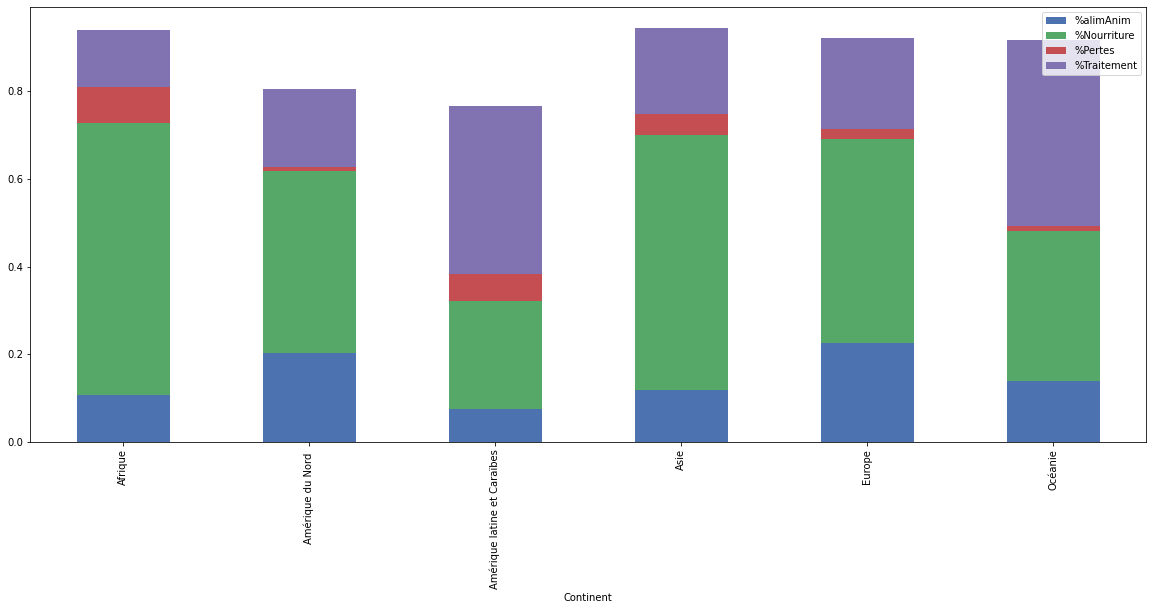

In [135]:

VentilationDispoInterne.plot(kind='bar', stacked=True, figsize=(20,8))

In [136]:
TableDispoInter2013[TableDispoInter2013['Continent'] == 'Amérique latine et Caraïbes'].sort_values(
    by='Traitement', ascending=False).head(25)

,Continent,Zone,Produit,Origine,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock
2249,Amérique latine et Caraïbes,Brésil,"Sucre, canne",vegetale,6900.0,347309.0,739267.0,0.0,NaN,3300.0,55047.0,739267.0,NaN,326711.0,NaN
9689,Amérique latine et Caraïbes,Mexique,"Sucre, canne",vegetale,0.0,815.0,61181.0,1.0,0.0,56.0,1224.0,61182.0,NaN,59086.0,NaN
2245,Amérique latine et Caraïbes,Brésil,Soja,vegetale,637.0,NaN,38086.0,42797.0,283.0,725.0,NaN,81700.0,1211.0,35513.0,-1100.0
779,Amérique latine et Caraïbes,Argentine,Soja,vegetale,986.0,NaN,36608.0,7783.0,5.0,0.0,493.0,49306.0,1088.0,34041.0,-4920.0
3548,Amérique latine et Caraïbes,Colombie,"Sucre, canne",vegetale,108.0,2946.0,34870.0,6.0,NaN,NaN,NaN,34876.0,1122.0,30694.0,NaN
6121,Amérique latine et Caraïbes,Guatemala,"Sucre, canne",vegetale,32.0,231.0,26335.0,0.0,NaN,NaN,263.0,26335.0,NaN,25808.0,NaN
782,Amérique latine et Caraïbes,Argentine,"Sucre, canne",vegetale,NaN,NaN,23700.0,NaN,NaN,NaN,50.0,23700.0,NaN,23650.0,NaN
4012,Amérique latine et Caraïbes,Cuba,"Sucre, canne",vegetale,1800.0,NaN,16100.0,NaN,NaN,NaN,NaN,16100.0,NaN,14300.0,NaN
11520,Amérique latine et Caraïbes,Pérou,"Sucre, canne",vegetale,NaN,NaN,10992.0,NaN,NaN,NaN,NaN,10992.0,NaN,10992.0,NaN
1968,Amérique latine et Caraïbes,Bolivie (État plurinational de),"Sucre, canne",vegetale,NaN,NaN,8363.0,NaN,0.0,NaN,NaN,8363.0,NaN,8363.0,NaN


In [137]:
TableDispoInter2013[TableDispoInter2013['Continent']=='Asie'].sort_values(by='Traitement', ascending=False).head(25)

,Continent,Zone,Produit,Origine,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Semences,Traitement,variationStock
6819,Asie,Inde,"Sucre, canne",vegetale,6824.0,NaN,341200.0,0.0,0.0,11948.0,5118.0,341200.0,17060.0,300250.0,NaN
3264,Asie,"Chine, continentale","Sucre, canne",vegetale,7183.0,NaN,129126.0,3.0,928.0,NaN,NaN,128201.0,NaN,121943.0,0.0
14200,Asie,Thaïlande,"Sucre, canne",vegetale,NaN,NaN,100096.0,0.0,NaN,4095.0,1001.0,100096.0,NaN,95000.0,NaN
3259,Asie,"Chine, continentale",Soja,vegetale,9530.0,NaN,75081.0,250.0,63381.0,5072.0,604.0,11951.0,713.0,59162.0,0.0
11144,Asie,Pakistan,"Sucre, canne",vegetale,NaN,NaN,61750.0,0.0,0.0,3375.0,NaN,63750.0,6375.0,52000.0,-2000.0
6915,Asie,Indonésie,"Sucre, canne",vegetale,NaN,NaN,33700.0,0.0,0.0,NaN,NaN,33700.0,NaN,33700.0,NaN
11616,Asie,Philippines,"Sucre, canne",vegetale,60.0,NaN,31874.0,0.0,NaN,10.0,1116.0,31874.0,1045.0,29643.0,0.0
15128,Asie,Viet Nam,"Sucre, canne",vegetale,NaN,247.0,20131.0,NaN,NaN,1007.0,1007.0,20131.0,221.0,17650.0,NaN
14683,Asie,Turquie,"Sucre, betterave",vegetale,NaN,NaN,16500.0,0.0,0.0,NaN,NaN,16500.0,NaN,16500.0,NaN
3205,Asie,"Chine, continentale",Graines Colza/Moutarde,vegetale,3715.0,91.0,18137.0,2.0,3664.0,1.0,726.0,14475.0,264.0,13341.0,0.0


<h3> <font color=orange>2017</font></h3>

<font size=3>Vérification de la concordance des clés primaires, de manière à pouvoir créer une table avec la répartition par continent</font>

In [138]:
tableDispoAlim2017=tableDispoAlim2017.reset_index()

CheckPays= list(set(tableDispoAlim2017.Zone.unique()).difference(dataPays.Zone.unique()))
CheckPays
    

[]

<font size=3> En vérifiant la liste des produis on se rend compte que l'on a les aggrégat "Produits Vegetaux" et "Produit Animaux" . De plus, les disponiblités alimentaires par hab ne nous interessent pas ici </font>

In [139]:

tableDispoAlim2017.Produit.unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas et produits', 'Arachides',
       'Avoine', 'Bananes', 'Bananes plantains', 'Beurre, Ghee', 'Bière',
       'Blé et produits', 'Boissons Alcooliques', 'Boissons Fermentés',
       'Café et produits', 'Citrons & Limes et produits',
       'Coco (Incl Coprah)', 'Crème', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao et produits',
       'Fruits, Autres', 'Girofles', 'Graines Colza/Moutarde',
       'Graines de coton', 'Graines de tournesol',
       'Graisses Animales Crue', 'Haricots', 'Huil Plantes Oleif Autr',
       'Huile Graines de Coton', "Huile d'Arachide", "Huile d'Olive",
       'Huile de Coco', 'Huile de Colza&Moutarde',
       'Huile de Germe de Maïs', 'Huile de Palme', 'Huile de Palmistes',
       'Huile de Soja', 'Huile de Son de Riz', 'Huile de Sésame',
       'Huile de Tournesol', 'Ignames', 'Lait - Excl Beurre',
       'Légumes, Autres

In [140]:
x=tableDispoAlim2017.drop(columns=[
                        'dispoAlim', 'dispoAlimQt', 'dispoAlimProtQt', 'dispoAlimMatGrasQt'])
x.query("Produit not in ['Produits Animaux','Produits Vegetaux']")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<font size=3> On fusionne </font>

In [141]:
Table2017=pd.merge(dataPays,x.query("Produit not in ['Produits Animaux','Produits Vegetaux']"), how='right', on='Zone')

<font size=3> On teste la table obtenue </font>

In [142]:
Table2017.Continent.unique()

array(['Asie', 'Afrique', 'Europe', 'Amérique latine et Caraïbes',
       'Océanie', 'Amérique du Nord '], dtype=object)

In [143]:
Table2017.columns.tolist()

['Continent',
 'Zone',
 'Produit',
 'alimTouriste',
 'alimAnim',
 'autreUtilisation',
 'dispoInter',
 'export',
 'import',
 'Nourriture',
 'Pertes',
 'Production',
 'Résidus',
 'Semences',
 'Traitement',
 'variationStock']

<font size=3> On créé une table pivot pour regrouper les données par continent </font>

In [144]:
table2017Continent =pd.pivot_table(data=Table2017.drop(columns=['Zone','Produit']), index=['Continent'], aggfunc={'alimTouriste':np.sum,
 'alimAnim':np.sum,
 'autreUtilisation':np.sum,
 'dispoInter':np.sum,
 'export':np.sum,
 'import':np.sum,
 'Nourriture':np.sum,
 'Pertes':np.sum,
 'Production':np.sum,
 'Résidus':np.sum,
 'Semences':np.sum,
 'Traitement':np.sum,
 'variationStock': sum,
 })
table2017Continent

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<h4> création des pourcentages globaux </h4>

$$ DispoInter= Alimentation humaine + Alimentation animale + Traitement+ Autre Utilisation+ Semence - Résidus $$

In [145]:
print("le pourcentage de la disponibilité interne perdue est de : {}%".format(round(table2017Continent.Pertes.sum()*100/table2017Continent.dispoInter.sum(),2)))

le pourcentage de la disponibilité interne perdue est de : 5.35%


In [146]:
print("le pourcentage de la disponibilité interne dédiée à l'alimentation humaine est de : {}%".format(round(table2017Continent.Nourriture.sum()*100/table2017Continent.dispoInter.sum(),2)))

le pourcentage de la disponibilité interne dédiée à l'alimentation humaine est de : 47.71%


In [147]:
print("le pourcentage de la disponibilité interne dédiée à l'alimentation animale est de : {}%".format(round(table2017Continent.alimAnim.sum()*100/table2017Continent.dispoInter.sum(),2)))

le pourcentage de la disponibilité interne dédiée à l'alimentation animale est de : 12.78%


In [148]:
print("le pourcentage de la disponibilité interne dédié aux traitements est de : {}%".format(round(table2017Continent.Traitement.sum()*100/table2017Continent.dispoInter.sum(),2)))

le pourcentage de la disponibilité interne dédié aux traitements est de : 24.64%


In [149]:
print("le pourcentage de la disponibilité interne dédié aux semences est de : {}%".format(round(table2017Continent.Semences.sum()*100/table2017Continent.dispoInter.sum(),2)))

le pourcentage de la disponibilité interne dédié aux semences est de : 1.55%


In [150]:
100-(5.35+1.55+24.64+12.78+47.71)

7.969999999999999

In [151]:
print("le pourcentage de la disponibilité interne dédié aux autres utilisations est de : {}%".format(round(table2017Continent.autreUtilisation.sum()*100/table2017Continent.dispoInter.sum(),2)))


le pourcentage de la disponibilité interne dédié aux autres utilisations est de : 8.12%


<h4>créations de pourcentage par continent</h4>

In [152]:
table2017Continent['%AlimHum']= table2017Continent['Nourriture']/table2017Continent['dispoInter']
table2017Continent['%AlimAnim']=table2017Continent['alimAnim']/table2017Continent['dispoInter']
table2017Continent['%Traitement']=table2017Continent['Traitement']/table2017Continent['dispoInter']
table2017Continent['%Pertes']=table2017Continent['Pertes']/table2017Continent['dispoInter']
table2017Continent['%autreUtilisation']=table2017Continent['autreUtilisation']/table2017Continent['dispoInter']


In [153]:
table2017Continent.drop(columns=['Nourriture','Pertes','Production', 'Résidus', 'Semences',
 'Traitement', 'alimAnim', 'alimTouriste', 'autreUtilisation', 'dispoInter', 'export', 'import',
 'variationStock']).style.format("{:.2%}")

,%AlimHum,%AlimAnim,%Traitement,%Pertes,%autreUtilisation
Continent,,,,,
Afrique,61.09%,10.42%,14.22%,7.80%,3.54%
Amérique du Nord,38.07%,19.26%,20.49%,3.74%,17.66%
Amérique latine et Caraïbes,24.17%,8.82%,37.97%,7.79%,20.70%
Asie,56.30%,11.72%,21.33%,5.04%,4.42%
Europe,42.90%,19.28%,28.17%,2.96%,4.14%
Océanie,30.77%,10.93%,51.41%,3.89%,2.15%


In [154]:
VentilationDispoInterne.style.format("{:.2%}")

,%alimAnim,%Nourriture,%Pertes,%Traitement
Continent,,,,
Afrique,10.72%,62.13%,8.19%,12.97%
Amérique du Nord,20.36%,41.38%,1.08%,17.76%
Amérique latine et Caraïbes,7.44%,24.81%,6.12%,38.20%
Asie,11.93%,58.13%,4.72%,19.70%
Europe,22.50%,46.49%,2.49%,20.65%
Océanie,13.81%,34.29%,1.19%,42.31%


<AxesSubplot:xlabel='Continent'>

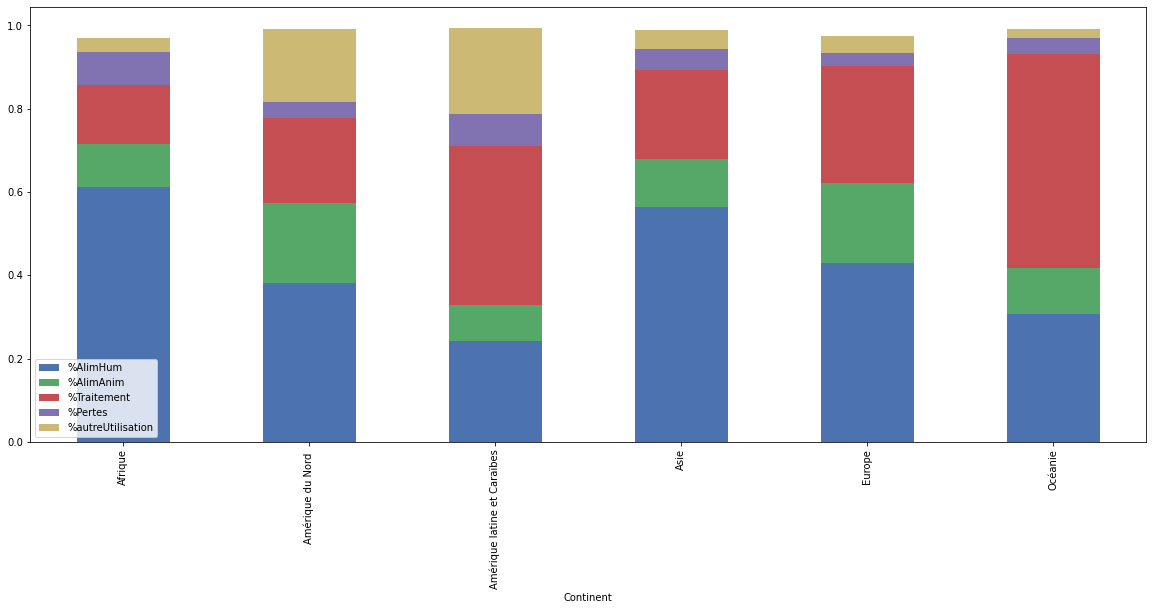

In [155]:
table2017Continent.drop(columns=['Nourriture','Pertes','Production','Résidus','Semences','Traitement','alimAnim','alimTouriste',
    'autreUtilisation','dispoInter','export','import',
    'variationStock']).plot(kind='bar', stacked=True, figsize=(20, 8))

<h4> les Traitements et autres utilisations</h4>

<font size=4> Très rapidement, on observe que les<font color=cornflowerblue> traitements concernent des cultures 'industrielles' </font> c'est à dire des culture qui nécessite un processus de transformation pour être utilisées. Par exemple s'il est possible de consommer de la canne à sucre tel quel (les enfants adorent), elle fait généralement l'objet d'un processus de transfortion pour devenir du sucre.<br>
On note aussi que ces cultures (sucre, soja, palme) sont utilisées à des fins non alimentaires (biocarburants, cosmetiques, chimie...)</font>

In [156]:
Table2017.sort_values(by='Traitement', ascending=False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
2047,Amérique latine et Caraïbes,Brésil,"Sucre, canne",NaN,6835.0,324953.0,758646.0,0.0,NaN,3291.0,83487.0,758646.0,0.0,NaN,340080.0,NaN
6294,Asie,Inde,"Sucre, canne",NaN,17254.0,NaN,306069.0,0.0,0.0,16840.0,7458.0,306069.0,0.0,14300.0,250217.0,NaN
6368,Asie,Indonésie,Palmistes,NaN,0.0,NaN,166251.0,0.0,0.0,NaN,10337.0,166251.0,0.0,NaN,155914.0,0.0
8505,Asie,Malaisie,Palmistes,NaN,0.0,NaN,96696.0,0.0,0.0,NaN,NaN,101741.0,0.0,NaN,96696.0,5045.0
3274,Asie,"Chine, continentale",Soja,NaN,10743.0,NaN,105451.0,150.0,95538.0,5199.0,897.0,13129.0,0.0,719.0,87893.0,3066.0
3279,Asie,"Chine, continentale","Sucre, canne",NaN,11806.0,NaN,104501.0,2.0,99.0,0.0,5199.0,104404.0,0.0,NaN,87495.0,0.0
14361,Asie,Thaïlande,"Sucre, canne",NaN,NaN,949.0,93065.0,28.0,5.0,4455.0,1019.0,93088.0,0.0,NaN,86642.0,NaN
10791,Asie,Pakistan,"Sucre, canne",NaN,0.0,NaN,83333.0,0.0,0.0,5485.0,4111.0,83333.0,0.0,8524.0,65214.0,0.0
9273,Amérique latine et Caraïbes,Mexique,"Sucre, canne",NaN,1365.0,560.0,56954.0,1.0,0.0,52.0,1139.0,56955.0,0.0,NaN,53838.0,0.0
16036,Amérique du Nord,États-Unis d'Amérique,Soja,NaN,4118.0,NaN,61675.0,55412.0,742.0,37.0,606.0,120065.0,0.0,3492.0,53423.0,3720.0


<font size=4> Si on s'attarde sur le cas du sucre brésilien, on voit que la production 'sucre, canne' se divise environ pour moitié entre les traitements et les autres utilisations. Ce qui est cohérent avec ce que nous savons du <font color=cornflowerblue>Brésil qui dédit la moitié de sa production de canne à sucre à la production de bioéthanol</font>. <br>
Le taux de sucre contenue dans la canne est compris entre 10 et 15% ce qui nous permet de retomber sur la ligne 'Sucre Eq Brut' et les 29MT d'exportation brésilienne <br>
</font> 

In [157]:
Table2017.query("Produit in ['Sucre Eq Brut','Sucre non centrifugé', 'Sucre, betterave', 'Sucre, canne','Alcool, non Comestible','Boissons Alcooliques'] & Zone=='Brésil'").drop(columns=['alimTouriste','alimAnim','Résidus','Semences']) 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [158]:
Table2017.query("Produit in ['Soja','Huile de Soja',] & Zone=='Inde'").drop(columns=['alimTouriste','alimAnim','Résidus','Semences']) 

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [159]:
Table2017.query("Produit in ['Sucre Eq Brut','Sucre non centrifugé', 'Sucre, betterave', 'Sucre, canne','Alcool, non Comestible','Boissons Alcooliques']").drop(
    columns=['alimTouriste', 'alimAnim', 'Résidus', 'Semences']).groupby(by='Produit').sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [160]:
Table2017.Produit.unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas et produits', 'Arachides',
       'Avoine', 'Bananes', 'Bananes plantains', 'Beurre, Ghee', 'Bière',
       'Blé et produits', 'Boissons Alcooliques', 'Boissons Fermentés',
       'Café et produits', 'Citrons & Limes et produits',
       'Coco (Incl Coprah)', 'Crème', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao et produits',
       'Fruits, Autres', 'Girofles', 'Graines Colza/Moutarde',
       'Graines de coton', 'Graines de tournesol',
       'Graisses Animales Crue', 'Haricots', 'Huil Plantes Oleif Autr',
       'Huile Graines de Coton', "Huile d'Arachide", "Huile d'Olive",
       'Huile de Coco', 'Huile de Colza&Moutarde',
       'Huile de Germe de Maïs', 'Huile de Palme', 'Huile de Palmistes',
       'Huile de Soja', 'Huile de Son de Riz', 'Huile de Sésame',
       'Huile de Tournesol', 'Ignames', 'Lait - Excl Beurre',
       'Légumes, Autres

<h4> <font color=orange>Résultats</font></h4>

 
<font size = 4> Pour éviter de compter 2 fois les mêmes choses et supprimer un trop fort biais en faveur des économies industrialisée, j'ai pris le parti de supprimer les traitements des disponibilités internes.<br><br>
    <u>Pour rappel</u>: <br><br>
<font size=3>$$ DispoInter= Alimentation humaine + Alimentation animale + Traitement+ Autre Utilisation+ Semence - Résidus $$</font>
<br>
    L<font color=cornflowerblue> La diponibilité interne au niveau mondial </font>se divise comme suit:
* 17% à l'alimentation animale
* 11% à des utilisations non-alimentaires (bio-carburant, bioplastique, cosmétique, chimie...)
* 63% à l'alimentation humaine
    </font>

In [161]:
print("le pourcentage de la disponibilité interne perdue est de : {}%".format(round(table2017Continent.Pertes.sum()*100/(table2017Continent.dispoInter.sum()-table2017Continent.Traitement.sum()),2)))

print("le pourcentage de la disponibilité utilisé à des fins d'alimentation humaine est de : {}%".format(round(table2017Continent.Nourriture.sum()*100/(table2017Continent.dispoInter.sum()-table2017Continent.Traitement.sum()),2)))

print("le pourcentage de la disponibilité interne pour l'alimentation animale est de : {}%".format(round(table2017Continent.alimAnim.sum()*100/(table2017Continent.dispoInter.sum()-table2017Continent.Traitement.sum()),2)))

print("le pourcentage de la disponibilité interne utilisée autrement est de : {}%".format(round(table2017Continent.autreUtilisation.sum()*100/(table2017Continent.dispoInter.sum()-table2017Continent.Traitement.sum()),2)))

le pourcentage de la disponibilité interne perdue est de : 7.11%
le pourcentage de la disponibilité utilisé à des fins d'alimentation humaine est de : 63.31%
le pourcentage de la disponibilité interne pour l'alimentation animale est de : 16.95%
le pourcentage de la disponibilité interne utilisée autrement est de : 10.78%


In [162]:
table2017Continent['%AlimHum']= table2017Continent['Nourriture']/(table2017Continent['dispoInter']-table2017Continent['Traitement'])
table2017Continent['%AlimAnim']=table2017Continent['alimAnim']/(table2017Continent['dispoInter']-table2017Continent['Traitement'])
table2017Continent['%Pertes']=table2017Continent['Pertes']/(table2017Continent['dispoInter']-table2017Continent['Traitement'])
table2017Continent['%autreUtilisation']=table2017Continent['autreUtilisation']/(table2017Continent['dispoInter']-table2017Continent['Traitement'])


<font size=3> En ventillant cette <font color=cornflowerblue>utilisation par continent</font>, on observe une différence dans l'utilisation des disponibilités internes.<br>
Il semblerait que plus le niveau de vie augmente moins la part des disponibilités internes allouées à l'alimentation humaine est importante.<br>
On voit le <font color=cornflowerblue>poids important des cultures à visée non alimentaire sur le continent américain </font>avec le mais pour les Etats-Unis et la canne à sucre et le soja pour l'Amérique latine qui sont utilisé notamment pour les bio-carburants.
</font>

In [163]:
table2017Continent.drop(columns=['Nourriture',
 'Pertes',
 'Production',
 'Résidus',
 'Semences',
 'Traitement',
 'alimAnim',
 'alimTouriste',
 'autreUtilisation',
 'dispoInter',
 'export',
 'import',
 'variationStock',
 '%Traitement',]).style.format("{:.2%}")

,%AlimHum,%AlimAnim,%Pertes,%autreUtilisation
Continent,,,,
Afrique,71.22%,12.14%,9.09%,4.13%
Amérique du Nord,47.87%,24.22%,4.70%,22.22%
Amérique latine et Caraïbes,38.96%,14.22%,12.56%,33.37%
Asie,71.56%,14.90%,6.40%,5.62%
Europe,59.73%,26.85%,4.12%,5.77%
Océanie,63.32%,22.49%,8.00%,4.42%


In [164]:
AmSud=Table2017.query("Continent=='Amérique latine et Caraïbes'")
AmSud.sort_values('autreUtilisation', ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [165]:
AmNord=Table2017.query("Continent=='Amérique du Nord '")
AmNord.sort_values('autreUtilisation', ascending=False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
16007,Amérique du Nord,États-Unis d'Amérique,Maïs et produits,NaN,134735.0,141583.0,323231.0,53507.0,1756.0,3918.0,18264.0,371096.0,0.0,807.0,23925.0,-3886.0
15986,Amérique du Nord,États-Unis d'Amérique,Graisses Animales Crue,NaN,526.0,2504.0,3454.0,413.0,61.0,361.0,64.0,3896.0,0.0,NaN,NaN,91.0
16003,Amérique du Nord,États-Unis d'Amérique,Lait - Excl Beurre,NaN,480.0,2296.0,95771.0,2735.0,1015.0,73868.0,NaN,97787.0,-3.0,NaN,19130.0,297.0
15993,Amérique du Nord,États-Unis d'Amérique,Huile de Colza&Moutarde,NaN,NaN,1900.0,2692.0,103.0,1992.0,670.0,0.0,757.0,0.0,NaN,121.0,-46.0
2732,Amérique du Nord,Canada,Blé et produits,NaN,2681.0,1881.0,8188.0,23302.0,1368.0,2702.0,20.0,30390.0,0.0,903.0,0.0,269.0
2771,Amérique du Nord,Canada,Maïs et produits,NaN,10662.0,1456.0,13590.0,1800.0,1137.0,707.0,647.0,14096.0,0.0,15.0,102.0,-157.0
15995,Amérique du Nord,États-Unis d'Amérique,Huile de Palme,NaN,NaN,1365.0,1365.0,86.0,1399.0,0.0,NaN,NaN,0.0,NaN,NaN,-52.0
15997,Amérique du Nord,États-Unis d'Amérique,Huile de Soja,NaN,NaN,1097.0,9319.0,1070.0,138.0,4418.0,0.0,10380.0,0.0,NaN,3804.0,129.0
16047,Amérique du Nord,États-Unis d'Amérique,Viande de porcins,NaN,NaN,1043.0,9672.0,2518.0,627.0,8714.0,NaN,11611.0,-86.0,NaN,0.0,48.0
15979,Amérique du Nord,États-Unis d'Amérique,Edulcorants Autres,NaN,0.0,1032.0,11436.0,3387.0,2659.0,10486.0,NaN,13746.0,-83.0,NaN,0.0,1582.0


## <u>Ventilation disponibilité interne volet production </u>

$$ DispoInter= Production + Importation - Exportation - Variation de Stock $$

<h3>2013</h3>


In [166]:
TauxDepM = DispoInter2013ParContinent['import'].sum(
)*100/DispoInter2013ParContinent['dispoInter'].sum()
print("En moyenne le taux de dépendance aux importations est de {}% au niveau global".format(
    round(TauxDepM, 2)))

En moyenne le taux de dépendance aux importations est de 12.81% au niveau global


In [167]:
DispoInter2013ParContinent['%DependanceImportation'] = DispoInter2013ParContinent['import'] / \
    DispoInter2013ParContinent['dispoInter']

In [168]:
DispoInter2013ParContinent['%AutoSuffisance'] = DispoInter2013ParContinent['Production'] / \
    DispoInter2013ParContinent['dispoInter']

In [169]:
DispoInter2013ParContinent['%exportarion']=DispoInter2013ParContinent['export']/DispoInter2013ParContinent['Production']

In [170]:
VentilationDispoInterneParSource= DispoInter2013ParContinent.drop(columns=['Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'alimAnim',
 'autreUtilisation',
 'dispoInter',
 'export',
 'import',
 'variationStock',
 '%alimAnim',
 '%Nourriture',
 '%Pertes',
 '%Traitement'], axis=1)
VentilationDispoInterneParSource.style.format("{:.2%}")

,%DependanceImportation,%AutoSuffisance,%exportarion
Continent,,,
Afrique,12.98%,92.39%,4.45%
Amérique du Nord,11.82%,119.19%,21.36%
Amérique latine et Caraïbes,6.25%,110.16%,14.31%
Asie,10.58%,96.07%,6.15%
Europe,29.85%,104.21%,32.57%
Océanie,11.28%,165.30%,50.22%


<h3><font color=orange>2017</font></h3>

<font size=3> Sans surprise, <font color=cornflowerblue>les productions africaines et asiatiques ne suffisent pas à couvrir leurs besoins en disponibilités internes</font>. <br>
    Les économies développées dont beaucoup plus intégrées dans le commerce mondial.<br>
       
    /!\
* Le commerce intra-UE gonfle les chiffre du commerce exterieur européen
* Le poids de l'Australie influe énormément l'Océanie
    
</font>

In [171]:
table2017Continent['%DependanceImportation'] = table2017Continent['import'] / \
    (table2017Continent['dispoInter'])
table2017Continent['%AutoSuffisance']= table2017Continent['Production']/ (table2017Continent['dispoInter'])
table2017Continent['%export']=table2017Continent['export']/table2017Continent['Production']


In [172]:
pd.pivot_table(data=table2017Continent.reset_index().drop(columns=['Nourriture','Pertes','Production','Résidus','Semences','Traitement','alimAnim','alimTouriste','autreUtilisation','dispoInter','export','import','variationStock','%AlimHum','%AlimAnim','%Traitement',
 '%Pertes','%autreUtilisation']), index='Continent').style.format("{:.2%}")

,%AutoSuffisance,%DependanceImportation,%export
Continent,,,
Afrique,92.93%,14.14%,4.78%
Amérique du Nord,118.18%,11.22%,24.25%
Amérique latine et Caraïbes,111.31%,6.81%,15.43%
Asie,96.54%,11.28%,6.23%
Europe,107.67%,30.11%,32.65%
Océanie,155.69%,9.41%,39.45%


In [173]:
Table2017.query("Continent=='Océanie'").sort_values('export', ascending=False).head(20)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
935,Océanie,Australie,Blé et produits,NaN,4086.0,851.0,7933.0,22294.0,260.0,1820.0,318.0,31819.0,0.0,789.0,68.0,1852.0
10272,Océanie,Nouvelle-Zélande,Lait - Excl Beurre,NaN,57.0,0.0,9951.0,11339.0,142.0,595.0,214.0,21372.0,0.0,NaN,9085.0,223.0
984,Océanie,Australie,Orge et produits,NaN,2284.0,NaN,2957.0,9729.0,11.0,NaN,56.0,13506.0,0.0,298.0,319.0,831.0
1005,Océanie,Australie,Sucre Eq Brut,NaN,6.0,0.0,1228.0,3803.0,80.0,875.0,NaN,4939.0,0.0,NaN,347.0,-12.0
972,Océanie,Australie,Légumineuses Autres et produits,NaN,831.0,NaN,1037.0,3096.0,5.0,18.0,87.0,4409.0,0.0,100.0,NaN,280.0
950,Océanie,Australie,Graines Colza/Moutarde,NaN,0.0,0.0,1018.0,2964.0,4.0,2.0,83.0,4316.0,0.0,15.0,918.0,339.0
970,Océanie,Australie,Lait - Excl Beurre,NaN,78.0,0.0,8351.0,2187.0,1208.0,5295.0,NaN,9332.0,0.0,NaN,2978.0,1.0
1012,Océanie,Australie,Viande de Bovins,NaN,NaN,NaN,695.0,1388.0,13.0,695.0,NaN,2069.0,0.0,NaN,0.0,-1.0
1016,Océanie,Australie,Vin,NaN,NaN,140.0,663.0,821.0,176.0,506.0,NaN,1369.0,0.0,NaN,17.0,61.0
10936,Océanie,Papouasie-Nouvelle-Guinée,Huile de Palme,NaN,NaN,NaN,43.0,620.0,24.0,36.0,7.0,645.0,0.0,NaN,NaN,6.0


In [174]:

Table2017[Table2017['export']>(Table2017['Production']+Table2017['import'])].sort_values(by='export', ascending=False).head(40)



C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
15337,Asie,Viet Nam,Manioc et produits,NaN,4792.00,NaN,-3726.00,14502.00,508.00,735.00,783.0,10268.00,-10036.0,NaN,0.0,0.00
15867,Amérique latine et Caraïbes,Équateur,Bananes,NaN,NaN,NaN,-133.00,6415.00,0.00,300.00,33.0,6282.00,-466.0,NaN,0.0,0.00
14959,Europe,Ukraine,Huile de Tournesol,NaN,NaN,NaN,-489.00,5766.00,0.00,242.00,NaN,5277.00,-788.0,NaN,57.0,0.00
11625,Amérique latine et Caraïbes,Pérou,Poissons Pelagiques,NaN,8.01,0.00,447.50,4444.35,154.56,439.49,NaN,3614.95,NaN,NaN,NaN,1122.34
6337,Asie,Indonésie,Huil Plantes Oleif Autr,0.0,NaN,268.00,-151.00,3356.00,78.00,58.00,NaN,2653.00,-477.0,NaN,NaN,-474.00
15087,Amérique latine et Caraïbes,Uruguay,Soja,NaN,NaN,NaN,-36.00,3251.00,3.00,0.00,96.0,3212.00,-273.0,75.0,65.0,0.00
14298,Asie,Thaïlande,Edulcorants Autres,NaN,NaN,2.00,87.00,2724.00,126.00,85.00,NaN,2588.00,0.0,NaN,0.0,-97.00
15301,Asie,Viet Nam,Café et produits,NaN,NaN,NaN,139.00,1590.00,29.00,207.00,76.0,1542.00,-144.0,NaN,0.0,-157.00
3216,Asie,"Chine, continentale",Edulcorants Autres,NaN,0.00,NaN,-209.00,1518.00,479.00,221.00,NaN,788.00,-430.0,NaN,0.0,-43.00
11109,Europe,Pays-Bas,Graines Colza/Moutarde,NaN,NaN,NaN,426.00,1315.00,1127.00,5.00,0.0,8.00,-156.0,0.0,577.0,-606.00


## <u>utilisation céréales</u>

In [175]:
Table2017['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas et produits', 'Arachides',
       'Avoine', 'Bananes', 'Bananes plantains', 'Beurre, Ghee', 'Bière',
       'Blé et produits', 'Boissons Alcooliques', 'Boissons Fermentés',
       'Café et produits', 'Citrons & Limes et produits',
       'Coco (Incl Coprah)', 'Crème', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao et produits',
       'Fruits, Autres', 'Girofles', 'Graines Colza/Moutarde',
       'Graines de coton', 'Graines de tournesol',
       'Graisses Animales Crue', 'Haricots', 'Huil Plantes Oleif Autr',
       'Huile Graines de Coton', "Huile d'Arachide", "Huile d'Olive",
       'Huile de Coco', 'Huile de Colza&Moutarde',
       'Huile de Germe de Maïs', 'Huile de Palme', 'Huile de Palmistes',
       'Huile de Soja', 'Huile de Son de Riz', 'Huile de Sésame',
       'Huile de Tournesol', 'Ignames', 'Lait - Excl Beurre',
       'Légumes, Autres

In [176]:
Cereales = Table2017.query(
    "Produit in ['Avoine','Blé et produits',  'Céréales, Autres','Maïs et produits',  'Millet et produits', 'Orge et produits','Riz et produits', 'Seigle et produits','Sorgho et produits']")
Cereales.sort_values(by="Nourriture", ascending=False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
3272,Asie,"Chine, continentale",Riz et produits,NaN,13960.0,2486.0,201198.0,1739.0,5932.0,166340.0,10406.0,212676.0,0.0,7003.0,1002.0,15672.0
6287,Asie,Inde,Riz et produits,NaN,2567.0,0.0,145232.0,18088.0,3.0,134274.0,4544.0,168500.0,0.0,3124.0,723.0,5184.0
3205,Asie,"Chine, continentale",Blé et produits,NaN,21192.0,2346.0,122319.0,603.0,4780.0,91297.0,2988.0,134631.0,0.0,4281.0,216.0,16489.0
6220,Asie,Inde,Blé et produits,NaN,2663.0,NaN,95228.0,648.0,5366.0,83340.0,6231.0,98510.0,-6.0,2999.0,0.0,8001.0
6384,Asie,Indonésie,Riz et produits,11.0,3241.0,12609.0,72729.0,22.0,452.0,51890.0,4382.0,81149.0,0.0,597.0,0.0,8849.0
1380,Asie,Bangladesh,Riz et produits,NaN,1625.0,8731.0,56280.0,10.0,2729.0,41587.0,3089.0,54148.0,0.0,1242.0,7.0,587.0
15968,Amérique du Nord,États-Unis d'Amérique,Blé et produits,NaN,1286.0,41.0,26282.0,28733.0,5397.0,26275.0,2176.0,47479.0,-5399.0,1724.0,177.0,-2139.0
10717,Asie,Pakistan,Blé et produits,NaN,507.0,6.0,25013.0,425.0,6.0,22696.0,667.0,26690.0,0.0,1132.0,6.0,1258.0
4916,Europe,Fédération de Russie,Blé et produits,NaN,17671.0,2.0,51775.0,33584.0,543.0,20729.0,515.0,86003.0,0.0,11800.0,1057.0,1187.0
15365,Asie,Viet Nam,Riz et produits,NaN,3386.0,2361.0,29328.0,9005.0,89.0,19672.0,2378.0,42764.0,0.0,1283.0,247.0,4519.0


part des céréales dans les dispo internes

In [177]:
Cereales.dispoInter.sum()/Table2017.dispoInter.sum()

0.26094375583885004

In [178]:
Cereales.groupby(by="Continent").sum().dispoInter/table2017Continent.dispoInter

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [179]:
Cereales.Nourriture.sum()/Table2017.Nourriture.sum()

0.2472168028158555

In [180]:
Cereales.groupby(by="Continent").sum().Nourriture/table2017Continent.Nourriture


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [181]:
Cereales.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [182]:
Cereales.head()

,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
6,Asie,Afghanistan,Avoine,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
11,Asie,Afghanistan,Blé et produits,NaN,491.0,NaN,7326.0,2.0,3080.0,5749.0,642.0,4281.0,100.0,344.0,0.0,32.0
18,Asie,Afghanistan,"Céréales, Autres",NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
47,Asie,Afghanistan,Maïs et produits,NaN,111.0,NaN,213.0,0.0,40.0,49.0,26.0,174.0,0.0,21.0,7.0,1.0
49,Asie,Afghanistan,Millet et produits,NaN,0.0,NaN,12.0,NaN,0.0,12.0,1.0,12.0,0.0,0.0,0.0,0.0


In [183]:
TableCereales = pd.pivot_table(data=Cereales, index=['Continent'], values=[
                          'Nourriture', 'alimAnim'],  aggfunc=np.sum, margins=True)

<font size= 5> On observe que l'<font color=cornflowerblue>utisation des céréales différe en fonction du niveau de vie du pays</font>. Ainsi les pays, les plus développés utilisent principalement les céréales dans l'alimentation animale alors que les pays moins développé les utilisent comme source de calories directement</font>

In [184]:
Cereales

,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
6,Asie,Afghanistan,Avoine,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
11,Asie,Afghanistan,Blé et produits,NaN,491.0,NaN,7326.0,2.0,3080.0,5749.0,642.0,4281.0,100.0,344.0,0.0,32.0
18,Asie,Afghanistan,"Céréales, Autres",NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
47,Asie,Afghanistan,Maïs et produits,NaN,111.0,NaN,213.0,0.0,40.0,49.0,26.0,174.0,0.0,21.0,7.0,1.0
49,Asie,Afghanistan,Millet et produits,NaN,0.0,NaN,12.0,NaN,0.0,12.0,1.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,Océanie,Îles Salomon,Maïs et produits,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0
16199,Océanie,Îles Salomon,Millet et produits,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16207,Océanie,Îles Salomon,Orge et produits,0.0,NaN,NaN,1.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0
16224,Océanie,Îles Salomon,Riz et produits,10.0,7.0,0.0,77.0,1.0,64.0,59.0,0.0,3.0,0.0,0.0,NaN,-11.0


In [185]:
TableCereales


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Continent'>

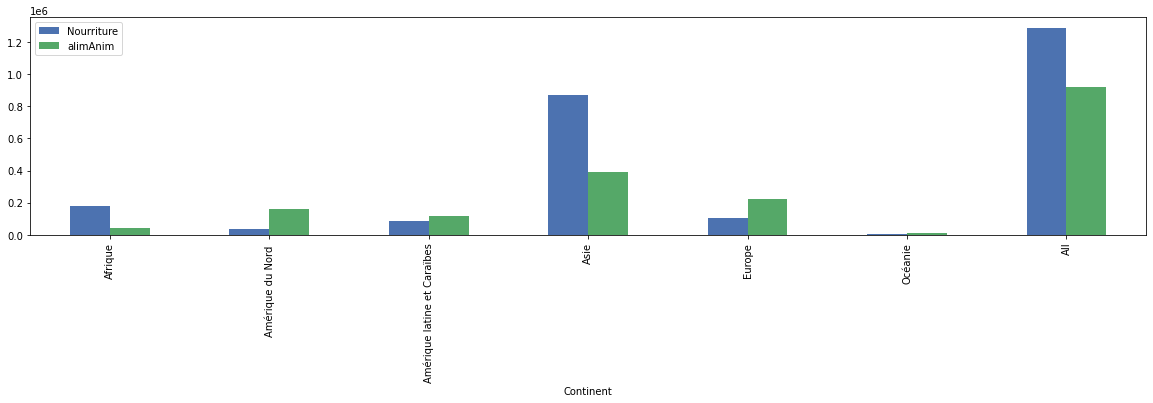

In [186]:
TableCereales.plot(kind='bar', figsize=(20,4))

<AxesSubplot:xlabel='Continent'>

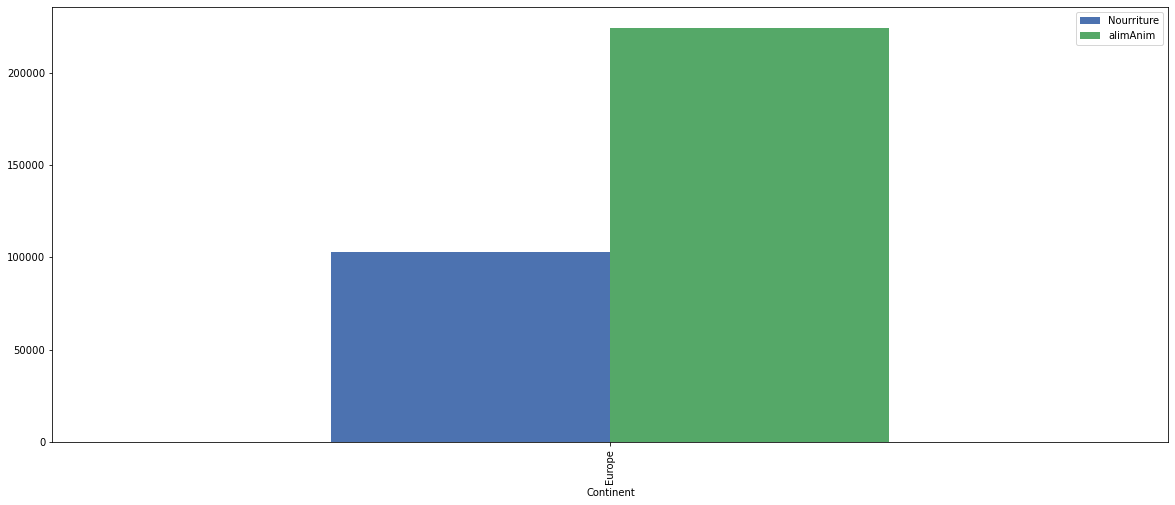

In [187]:
TableCereales.query('Continent=="Europe"').plot(kind='bar',figsize=(20,8))

<h1><font color=cornflowerblue>Thailande </font></h2>

<h2>Production</h2>

<font size=3> 
Les 3 principales productions thailandaises sont:
    
* le sucre de canne
* le riz
* le manioc
<br>
<br>Pour ces 3 produits, la Thailande exporte plus de la moitier de sa production.<br>

</font>

In [188]:
Table2017.query("Zone=='Thaïlande'").sort_values(by='Production', ascending=False).head(20)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
14361,Asie,Thaïlande,"Sucre, canne",NaN,NaN,949.0,93065.0,28.0,5.0,4455.0,1019.0,93088.0,0.0,NaN,86642.0,NaN
14354,Asie,Thaïlande,Riz et produits,NaN,3269.0,1564.0,18976.0,17609.0,87.0,11335.0,1290.0,31177.0,0.0,772.0,747.0,-5321.0
14326,Asie,Thaïlande,Manioc et produits,NaN,2063.0,219.0,4757.0,29409.0,2355.0,153.0,2321.0,30495.0,0.0,NaN,0.0,-1316.0
14338,Asie,Thaïlande,Palmistes,NaN,0.0,NaN,12367.0,0.0,0.0,NaN,NaN,14104.0,0.0,NaN,12367.0,1737.0
14358,Asie,Thaïlande,Sucre Eq Brut,NaN,NaN,NaN,3191.0,5910.0,25.0,2630.0,NaN,10728.0,0.0,NaN,561.0,1652.0
14300,Asie,Thaïlande,"Fruits, Autres",NaN,NaN,0.0,3940.0,2976.0,248.0,3614.0,383.0,6512.0,-194.0,NaN,137.0,-156.0
14327,Asie,Thaïlande,Maïs et produits,NaN,3604.0,NaN,4525.0,585.0,126.0,659.0,101.0,4821.0,0.0,22.0,139.0,-163.0
14324,Asie,Thaïlande,"Légumes, Autres",NaN,9.0,NaN,2736.0,545.0,482.0,2484.0,244.0,2824.0,0.0,NaN,NaN,25.0
14314,Asie,Thaïlande,Huile de Palme,NaN,NaN,1883.0,2336.0,314.0,16.0,208.0,NaN,2597.0,0.0,NaN,245.0,-38.0
14298,Asie,Thaïlande,Edulcorants Autres,NaN,NaN,2.0,87.0,2724.0,126.0,85.0,NaN,2588.0,0.0,NaN,0.0,-97.0


In [189]:
Table2017.query("Zone=='Thaïlande'& export>0.5*Production").sort_values(by='export', ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [190]:
Table2017.query("Zone=='Thaïlande'").sort_values(by='import', ascending=False).head(20)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
14287,Asie,Thaïlande,Blé et produits,NaN,1789.00,NaN,3130.00,302.00,3098.00,1315.00,0.0,1.00,0.0,0.0,25.0,-332.0
14356,Asie,Thaïlande,Soja,NaN,NaN,370.00,3019.00,17.00,2749.00,134.00,140.0,43.00,0.0,3.0,2372.0,-244.0
14326,Asie,Thaïlande,Manioc et produits,NaN,2063.00,219.00,4757.00,29409.00,2355.00,153.00,2321.0,30495.00,0.0,NaN,0.0,-1316.0
14348,Asie,Thaïlande,Poissons Pelagiques,NaN,150.00,0.00,909.40,1091.60,1436.61,759.40,NaN,564.39,NaN,NaN,NaN,0.0
14324,Asie,Thaïlande,"Légumes, Autres",NaN,9.00,NaN,2736.00,545.00,482.00,2484.00,244.0,2824.00,0.0,NaN,NaN,25.0
14337,Asie,Thaïlande,Orge et produits,NaN,NaN,NaN,436.00,137.00,445.00,0.00,1.0,140.00,0.0,1.0,434.0,12.0
14293,Asie,Thaïlande,Coco (Incl Coprah),NaN,148.00,13.00,891.00,304.00,440.00,600.00,67.0,762.00,-160.0,NaN,223.0,7.0
14300,Asie,Thaïlande,"Fruits, Autres",NaN,NaN,0.00,3940.00,2976.00,248.00,3614.00,383.0,6512.00,-194.0,NaN,137.0,-156.0
14347,Asie,Thaïlande,"Poissons Marins, Autres",NaN,270.09,0.10,274.13,295.22,235.31,3.94,NaN,334.04,NaN,NaN,NaN,0.0
14353,Asie,Thaïlande,Raisin,NaN,NaN,NaN,252.00,2.00,172.00,245.00,7.0,83.00,0.0,NaN,0.0,0.0


### Manioc en Thailande


In [191]:
Table2017.query("Zone=='Thaïlande'& Produit == 'Manioc et produits'")

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
14326,Asie,Thaïlande,Manioc et produits,NaN,2063.0,219.0,4757.0,29409.0,2355.0,153.0,2321.0,30495.0,0.0,NaN,0.0,-1316.0


In [192]:
Table2017.query("Produit == 'Manioc et produits'").sort_values('Production', ascending=False).head(5)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
9992,Afrique,Nigéria,Manioc et produits,NaN,27314.0,NaN,55072.0,8.0,11.0,23292.0,4466.0,55069.0,0.0,NaN,0.0,NaN
14326,Asie,Thaïlande,Manioc et produits,NaN,2063.0,219.0,4757.0,29409.0,2355.0,153.0,2321.0,30495.0,0.0,NaN,0.0,-1316.0
6356,Asie,Indonésie,Manioc et produits,2.0,408.0,1820.0,20858.0,92.0,1896.0,18137.0,434.0,19054.0,57.0,NaN,0.0,NaN
5230,Afrique,Ghana,Manioc et produits,NaN,4821.0,1558.0,19003.0,7.0,1.0,6921.0,5703.0,19009.0,0.0,NaN,NaN,NaN
2012,Amérique latine et Caraïbes,Brésil,Manioc et produits,NaN,9294.0,1088.0,18504.0,60.0,62.0,6730.0,1392.0,18502.0,0.0,NaN,0.0,NaN


<font size =5>Le cas du Manioc en Thaïlande est intéressant car il montre comment la spécialisation de certains pays dans certaines production en vue d'exportation peut se faire au détriement de la population </font>

<h2> l'alimentation </h2>

<font size=3> <font color=cornflowerblue> 45% de l'alimentation thailandaise est constituée de riz et de sucre</font>. Ce qui est cohérent avec l'épidémie d'obésité à laquelle on assiste en Asie du Sud-Est à mesure que la sous-nutrition baisse.
    [source](https://www.thailande-fr.com/societe/58262-lobesite-fleau-nepargne-plus-thailande-lasie#:~:text=%C2%AB%20Le%20changement%20a%20%C3%A9t%C3%A9%20le,%C2%BB%20publi%C3%A9e%20par%20l'ADBI.)
    </font>

In [193]:
Table2017.query("Zone=='Thaïlande'").sort_values(by='Nourriture',ascending=False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
14354,Asie,Thaïlande,Riz et produits,NaN,3269.0,1564.0,18976.0,17609.0,87.0,11335.0,1290.0,31177.0,0.0,772.0,747.0,-5321.0
14361,Asie,Thaïlande,"Sucre, canne",NaN,NaN,949.0,93065.0,28.0,5.0,4455.0,1019.0,93088.0,0.0,NaN,86642.0,NaN
14300,Asie,Thaïlande,"Fruits, Autres",NaN,NaN,0.0,3940.0,2976.0,248.0,3614.0,383.0,6512.0,-194.0,NaN,137.0,-156.0
14358,Asie,Thaïlande,Sucre Eq Brut,NaN,NaN,NaN,3191.0,5910.0,25.0,2630.0,NaN,10728.0,0.0,NaN,561.0,1652.0
14324,Asie,Thaïlande,"Légumes, Autres",NaN,9.0,NaN,2736.0,545.0,482.0,2484.0,244.0,2824.0,0.0,NaN,NaN,25.0
14286,Asie,Thaïlande,Bière,NaN,NaN,NaN,2260.0,242.0,19.0,2260.0,NaN,2234.0,0.0,NaN,NaN,-250.0
14287,Asie,Thaïlande,Blé et produits,NaN,1789.0,NaN,3130.0,302.0,3098.0,1315.0,0.0,1.0,0.0,0.0,25.0,-332.0
14323,Asie,Thaïlande,Lait - Excl Beurre,NaN,0.0,0.0,1198.0,121.0,126.0,1092.0,20.0,1200.0,0.0,NaN,87.0,6.0
14368,Asie,Thaïlande,Viande de porcins,NaN,NaN,NaN,970.0,14.0,1.0,970.0,NaN,994.0,0.0,NaN,0.0,11.0
14367,Asie,Thaïlande,Viande de Volailles,NaN,NaN,NaN,1006.0,796.0,2.0,907.0,35.0,1788.0,65.0,NaN,0.0,-13.0


In [194]:
(Table2017.query("Zone=='Thaïlande'& Produit=='Riz et produits'").Nourriture +
 Table2017.query("Zone=='Thaïlande'& Produit in ['Sucre Eq Brut','Sucre, canne']").Nourriture.sum())*100/Table2017.query("Zone=='Thaïlande'").Nourriture.sum()

14354    44.658378
Name: Nourriture, dtype: float64


C:\Users\mario\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


<h2>Sous-nutrition en Thailande</h2>

In [195]:
tablePop.query("Zone=='Thaïlande'")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

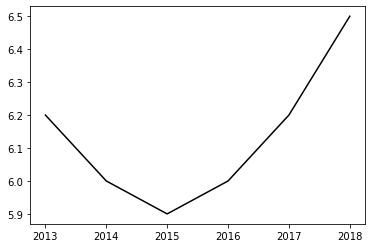

In [196]:
plt.plot(tablePop.query("Zone=='Thaïlande'").Annee, tablePop.query("Zone=='Thaïlande'").PopSN, color='k')


# <font color=cornflowerblue>Efficacité de l'aide alimentaire</font>

## <u>TOP 10 des Pays avec le plus fort taux de sous-nutrition 2017</u>


In [197]:
table2017.sort_values(by="%SN", ascending=False ).head(10)

,Zone,PopSN,Annee,PopTot,%SN
249,Haïti,5.3,2017,10.982366,0.482592
496,République populaire démocratique de Corée,12.0,2017,25.429825,0.471887
346,Madagascar,10.5,2017,25.570512,0.410629
334,Libéria,1.8,2017,4.702226,0.382797
322,Lesotho,0.8,2017,2.091534,0.382494
569,Tchad,5.7,2017,15.016753,0.379576
508,Rwanda,4.2,2017,11.980961,0.350556
400,Mozambique,9.4,2017,28.649018,0.328109
581,Timor-Leste,0.4,2017,1.243258,0.321735
4,Afghanistan,10.5,2017,36.296113,0.289287


## <u>Top 10 des pays ayant connu la plus forte progression du taux de sous-nutrition</u>

In [198]:
tablePropSNParZone.sort_values(by='EvolSN', ascending=False).drop(columns=2018).head(10).style.format("{:.2f}%")

Annee,2013,2014,2015,2016,2017,EvolSN
Zone,,,,,,
Lesotho,0.15%,0.24%,0.39%,0.39%,0.38%,0.23%
Venezuela (République bolivarienne du),0.05%,0.09%,0.14%,0.21%,0.27%,0.23%
Mozambique,0.23%,0.27%,0.31%,0.33%,0.33%,0.10%
Rwanda,0.26%,0.30%,0.34%,0.35%,0.35%,0.09%
Eswatini,0.09%,0.18%,0.18%,0.18%,0.18%,0.09%
Madagascar,0.33%,0.37%,0.40%,0.41%,0.41%,0.08%
République populaire démocratique de Corée,0.41%,0.43%,0.44%,0.46%,0.47%,0.06%
Mauritanie,0.08%,0.08%,0.10%,0.12%,0.12%,0.04%
Nigéria,0.09%,0.10%,0.11%,0.12%,0.12%,0.03%


## TOP 10 des Pays aves le plus de personnes souffrant de sous nutrition

In [199]:
table2017.sort_values(by="PopSN", ascending=False ).head(10)

,Zone,PopSN,Annee,PopTot,%SN
267,Inde,190.1,2017,1338.676785,0.142006
454,Pakistan,24.8,2017,207.906209,0.119285
273,Indonésie,23.6,2017,264.650963,0.089174
430,Nigéria,22.8,2017,190.873244,0.119451
51,Bangladesh,21.5,2017,159.685424,0.134640
201,Éthiopie,21.1,2017,106.399924,0.198308
478,Philippines,15.7,2017,105.172925,0.149278
502,République-Unie de Tanzanie,13.4,2017,54.660339,0.245150
496,République populaire démocratique de Corée,12.0,2017,25.429825,0.471887
304,Kenya,11.9,2017,50.221142,0.236952


## <u>TOP 10 des pays ayant le plus bénéficier d'aide alimentaire</u>


In [200]:
AideAlimPays= pd.pivot_table(data= AideAlim, index='Pays bénéficiaire', values="Valeur", aggfunc=sum)

In [201]:
AideAlimPays.sort_values(by='Valeur', ascending=False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


## <u>Aide alimentaire reçue en proportion de la population</u>

In [202]:
AideAlimPerCapita = pd.merge(AideAlim, dataPop1, how='left', left_on=[
                             'Pays bénéficiaire', 'Annee'], right_on=['Zone', 'Annee'])

In [203]:
AideAlimPerCapita.rename(columns={'Valeur_x':'QtRecue','Valeur_y':'Population'}, inplace=True)

In [204]:
AideAlimPerCapita.drop('Zone', axis=1, inplace=True)

In [205]:
AideAlimPerCapita['Qt/hab']= AideAlimPerCapita['QtRecue']/AideAlimPerCapita['Population']

In [206]:
TableAideAlimPerCapita = pd.pivot_table(data=AideAlimPerCapita, index=[
                                        'Pays bénéficiaire'], columns=['Annee'], values='Qt/hab', aggfunc=np.mean, margins=True)

In [207]:
TableAideAlimPerCapita.sort_values(by=2013 , ascending= False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Annee,2013,2014,2015,2016,All
Pays bénéficiaire,,,,,
Comores,5263.619261,NaN,NaN,NaN,5263.619261
Soudan du Sud,2708.551237,6098.871531,563.521158,NaN,3007.278574
République arabe syrienne,2398.750000,3483.940295,3240.892614,969.728002,2620.540329
Djibouti,2305.916610,1901.423731,466.816121,NaN,1595.680983
Palestine,1756.604433,2681.701018,1468.879701,NaN,2021.712456
République dominicaine,1626.289414,1148.167557,5.738362,5.578135,597.759779
Guinée-Bissau,1174.878887,547.878592,265.177375,NaN,698.778367
Yémen,1169.845099,446.793985,1405.040228,1713.672098,1203.601974
Soudan,1113.458610,941.793565,64.813300,NaN,743.229336


In [208]:
TableAideAlimPerCapita.sort_values(by=2016 , ascending= False).head(11)


C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Annee,2013,2014,2015,2016,All
Pays bénéficiaire,,,,,
Yémen,1169.845099,446.793985,1405.040228,1713.672098,1203.601974
République arabe syrienne,2398.750000,3483.940295,3240.892614,969.728002,2620.540329
Niger,423.685741,430.258471,341.571598,637.307513,452.428357
Libye,NaN,46.840344,333.265039,339.948387,240.017923
All,508.427641,498.853685,328.072465,326.763162,444.328049
Mauritanie,837.460386,500.649216,403.660858,187.941347,521.033597
Haïti,588.557954,392.311733,129.105860,164.233454,346.170269
Bhoutan,485.471751,101.522137,264.697100,147.955499,310.033777
Liban,112.439484,84.650419,NaN,119.149020,104.921239


In [209]:
TableAideAlimPerCapita.sort_values(by='All' , ascending= False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Annee,2013,2014,2015,2016,All
Pays bénéficiaire,,,,,
Comores,5263.619261,NaN,NaN,NaN,5263.619261
Soudan du Sud,2708.551237,6098.871531,563.521158,NaN,3007.278574
République arabe syrienne,2398.750000,3483.940295,3240.892614,969.728002,2620.540329
Palestine,1756.604433,2681.701018,1468.879701,NaN,2021.712456
Djibouti,2305.916610,1901.423731,466.816121,NaN,1595.680983
Yémen,1169.845099,446.793985,1405.040228,1713.672098,1203.601974
Sao Tomé-et-Principe,926.663439,1195.542771,NaN,NaN,1046.165364
Somalie,1070.140843,755.946556,577.395694,NaN,812.797856
Soudan,1113.458610,941.793565,64.813300,NaN,743.229336


<h2> Evolution de la SN dans les pays ayant le plus reçu d'aide</h2>

In [210]:
Table1=tablePropSNParZone.reset_index()


<font size=4> Sur les 10 pays ayant reçu le plus d'aide alimentaire en 2013, nous avons les données de la sous-nutrition pour 2 seulement.<br>
Dans les 2 cas, une baisse de la sous-nutrition a été observée. Alors que dans les 2 cas l'aide tend à diminuer </font>

In [211]:
Table1.drop(columns=2018).query("Zone in ['Soudan du Sud','République arabe syrienne','Djibouti','Palestine','République dominicaine','Guinée-Bissau','Yémen','Soudan','Somalie']")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<font size=4> Sur les 10 pays ayant reçu le plus d'aide alimentaire en 2016, nous avons les données de la sous-nutrition pour 4 seulement.<br>
Dans 3 cas, unebaisse de la sous-nutrition (parfois lègere) a été observée. Alors que dans le cas de la Mauritanie la hausse de la proportion des personnes sous-nutries n'a pas été enrayée </font>

In [212]:
TableAideAlimPerCapita.sort_values(by=2016 , ascending= False).head(11).index.tolist()


['Yémen',
 'République arabe syrienne',
 'Niger',
 'Libye',
 'All',
 'Mauritanie',
 'Haïti',
 'Bhoutan',
 'Liban',
 'El Salvador',
 "Côte d'Ivoire"]

In [213]:
Table1.drop(columns=2018).query(
    "Zone in ['Yémen','République arabe syrienne','Niger','Libye','Mauritanie','Haïti','Bhoutan','Liban','El Salvador']")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<font size=3> Nous avons les données de sous-nutrition de 2 pays parmis les 10 ayant reçu le plus d'aide par habitant au total.  </font>

In [214]:
Table1.query("Zone in ['Comores', 'Soudan du Sud', 'République arabe syrienne', 'Palestine', 'Djibouti', 'Yémen', 'Sao Tomé-et-Principe', 'Somalie', 'Soudan', 'Togo']")

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Aide alimentaire reçue par les pays souffrant le plus de sous-nutrition en 2017. On voit que l'aide alimentaire seule ne permet pas de supprimer une sous-nutrition "endémique".

In [215]:
AideAlimTOP10SN=TableAideAlimPerCapita.reset_index().rename(columns={'Pays bénéficiaire':'Pays'}).query("Pays  in ['Haïti','République populaire démocratique de Corée','Madagascar','Libéria','Lesotho','Tchad','Rwanda','Mozambique','Timor-Leste','Afghanistan']")
AideAlimTOP10SN.head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Annee,Pays,2013,2014,2015,2016,All
0,Afghanistan,496.744783,214.311652,NaN,NaN,355.528218
25,Haïti,588.557954,392.311733,129.105860,164.233454,346.170269
32,Lesotho,243.690423,322.145061,296.257299,NaN,288.802470
35,Libéria,577.839959,87.231378,NaN,NaN,332.535668
36,Madagascar,263.389349,116.225647,135.975821,NaN,171.863605
40,Mozambique,296.986533,165.657322,59.869828,NaN,206.118328
49,Rwanda,137.692405,44.678503,NaN,NaN,95.413359
55,République populaire démocratique de Corée,357.628555,191.477381,311.072584,31.610976,257.890036
65,Tchad,645.901001,895.867887,745.903708,83.506963,702.149785
66,Timor-Leste,25.145366,NaN,NaN,NaN,25.145366


<h2> pays disposant des plus forte dispo Alimentaire </h2>

<font size= 3> De forte disponibilité alimentaire (cal/jr/pers) ne garantissent pas d'échapper à la sous-nutrition. La question de l'accès à la nourriture est crutiale. A fortiori dans les pays ayant recours à l'importation pour convrir leur besoin alimentaire et où le prix des denrées peut être innaccessible aux personnes exclue du circuit de l'économie formelle
</font>

In [216]:
tableDA2017.sort_values(by='dispoAlim', ascending=False).head(10)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Zone,dispoAlim,Annee,Valeur,dispoAlimTot
315,Turquie,3153.0,2017,81.116450,255760.166850
311,Tunisie,3055.0,2017,11.433443,34929.168365
333,Égypte,3047.0,2017,96.442591,293860.574777
191,Maroc,3032.0,2017,35.581255,107882.365160
7,Algérie,2921.0,2017,41.389189,120897.821069
81,Cuba,2886.0,2017,11.339254,32725.087044
111,Ghana,2872.0,2017,29.121465,83636.847480
15,Arabie saoudite,2841.0,2017,33.101179,94040.449539
163,Koweït,2807.0,2017,4.056099,11385.469893
339,États-Unis d'Amérique,2753.0,2017,325.084756,894958.333268


In [217]:
pd.pivot_table(data=tablePop.query("Zone in ['Turquie', 'Tunisie','Égypte','Maroc','Algérie','Cuba','Ghana','Arabie saoudite','Koweït']"), index='Zone', values=['PopSN','%SN'], columns='Annee', aggfunc=sum)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux does not currently support dataframes with hierarchical indexes.
Please convert the dataframe into a flat table via `pandas.DataFrame.reset_index`.



%SN                                                    \
Annee                2013      2014      2015      2016      2017      2018   
Zone                                                                          
Algérie          0.034085  0.033399  0.032722  0.032058  0.031409  0.028417   
Arabie saoudite  0.049913  0.048518  0.047292  0.046234  0.048337  0.047474   
Ghana            0.071408  0.077136  0.075406  0.073731  0.068678  0.063829   
Maroc            0.044490  0.040945  0.037503  0.037009  0.039347  0.044409   
Tunisie          0.027390  0.027117       NaN       NaN       NaN       NaN   
Égypte           0.049771  0.047553  0.045434  0.047646  0.047697  0.046737   

                PopSN                           
Annee            2013 2014 2015 2016 2017 2018  
Zone                                            
Algérie           1.3  1.3  1.3  1.3  1.3  1.2  
Arabie saoudite   1.5  1.5  1.5  1.5  1.6  1.6  
Ghana             1.9  2.1  2.1  2.1  2.0  1.9  
Maroc             1.5  1.4  1.3  1.3  1.4  1.6  
Tunisie           0.3  0.3  NaN  NaN  NaN  NaN  
Égypte            4.4  4.3  4.2  4.5  4.6  4.6

In [218]:
tableDispoAlim2017.query("Zone =='Égypte'").sort_values(by='dispoAlim', ascending=False).head(40)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Élément,Zone,Produit,alimTouriste,alimAnim,autreUtilisation,dispoAlim,dispoAlimQt,dispoAlimMatGrasQt,dispoAlimProtQt,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
16078,Égypte,Produits Vegetaux,NaN,NaN,NaN,3047.0,NaN,38.51,72.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16014,Égypte,Blé et produits,2.0,1663.00,NaN,1162.0,145.22,6.20,35.23,17869.00,419.00,10141.00,14006.00,1885.0,8423.00,-2.0,316.0,0.0,276.0
16052,Égypte,Maïs et produits,1.0,8430.00,759.0,581.0,60.92,8.15,15.34,16889.00,14.00,8360.00,5876.00,1621.0,8543.00,0.0,34.0,168.0,0.0
16081,Égypte,Riz et produits,1.0,157.00,163.0,371.0,53.02,0.74,7.12,5445.00,45.00,87.00,5113.00,178.0,4961.00,-256.0,86.0,2.0,-442.0
16077,Égypte,Produits Animaux,NaN,NaN,NaN,296.0,NaN,19.29,25.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16085,Égypte,Sucre Eq Brut,0.0,234.00,715.0,257.0,25.52,0.00,0.00,3411.00,449.00,1232.00,2462.00,NaN,2550.00,0.0,NaN,0.0,-78.0
16048,Égypte,Lait - Excl Beurre,1.0,795.00,1.0,76.0,36.54,4.78,4.60,5419.00,104.00,94.00,3524.00,390.0,5423.00,0.0,NaN,707.0,-6.0
16075,Égypte,Pommes de Terre et produits,1.0,0.00,3.0,62.0,30.13,0.17,0.99,4360.00,784.00,163.00,2905.00,953.0,4841.00,0.0,498.0,0.0,-140.0
16043,Égypte,Huile de Soja,0.0,NaN,147.0,61.0,2.53,6.94,0.00,391.00,40.00,147.00,244.00,NaN,358.00,0.0,NaN,NaN,74.0
16024,Égypte,Dattes,0.0,NaN,NaN,61.0,14.30,0.16,0.59,1534.00,10.00,1.00,1379.00,154.0,1542.00,0.0,NaN,NaN,NaN


In [219]:
T1=pd.merge(dataPays, tableDA2017.groupby(by="Zone").sum(), how="right", on="Zone")
T1.head()

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Continent,Zone,dispoAlim,Annee,Valeur,dispoAlimTot
0,Asie,Afghanistan,2050.0,4034,72.592226,74407.031650
1,Afrique,Afrique du Sud,2935.0,4034,114.019512,167323.633860
2,Europe,Albanie,3390.0,4034,5.768338,9777.332910
3,Afrique,Algérie,3342.0,4034,82.778378,138322.669638
4,Europe,Allemagne,3542.0,4034,165.316818,292776.084678


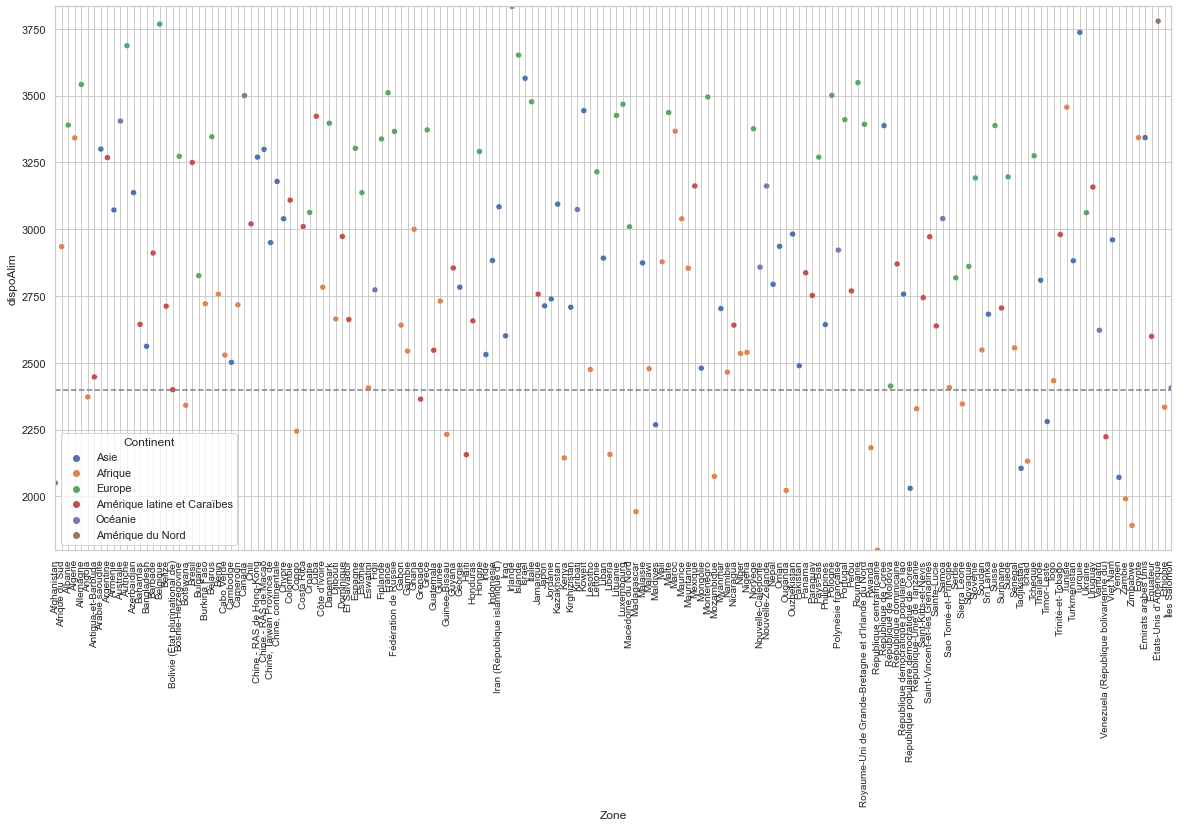

In [220]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
plt.axhline(y=2400,color='gray',linestyle='--')

plt.xticks(fontsize=10,rotation=90)

sns.scatterplot(x='Zone', y='dispoAlim', data=T1, hue='Continent', markers='x').margins(0)

In [221]:
AfriqueNourriture=Table2017.query("Continent =='Afrique'").groupby(by='Produit').sum().sort_values(by='Nourriture', ascending=False)

In [222]:
AfriqueNourriture[AfriqueNourriture.Nourriture>100].head(40)

C:\Users\mario\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,alimTouriste,alimAnim,autreUtilisation,dispoInter,export,import,Nourriture,Pertes,Production,Résidus,Semences,Traitement,variationStock
Produit,,,,,,,,,,,,,
Manioc et produits,0.0,43125.00,2518.0,131303.00,153.00,202.00,69277.00,16391.0,129871.00,-5.0,0.00,0.0,-1386.00
Blé et produits,7.0,5397.00,3617.0,71309.00,1523.00,48646.00,56598.00,3752.0,26032.00,622.0,1154.00,161.0,1841.00
Maïs et produits,2.0,28987.00,3223.0,94898.00,3594.00,21304.00,50637.00,8465.0,84217.00,1170.0,989.00,1417.0,7027.00
"Légumes, Autres",5.0,169.00,7.0,50151.00,1910.00,946.00,45469.00,4700.0,51419.00,-200.0,0.00,0.0,306.00
Riz et produits,4.0,2292.00,3301.0,46700.00,1136.00,20805.00,38647.00,2155.0,30528.00,-589.0,727.00,156.0,3499.00
Ignames,0.0,3636.00,4460.0,71557.00,27.00,16.00,37298.00,6117.0,77012.00,17476.0,2577.00,0.0,5438.00
Lait - Excl Beurre,5.0,3838.00,16.0,43965.00,564.00,1319.00,32095.00,2597.0,43262.00,101.0,0.00,5315.0,47.00
Sorgho et produits,0.0,2747.00,1669.0,26832.00,576.00,681.00,17779.00,2254.0,26262.00,-22.0,572.00,1834.0,-464.00
Tomates et produits,3.0,0.00,6.0,19623.00,804.00,1265.00,17744.00,1750.0,19363.00,6.0,0.00,114.0,195.00
